# Import libraries

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset

In [3]:
# Read dataset
df = pd.read_csv("./dataset.csv")
df.head()

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018


In [92]:
df.shape

(3504, 17)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Price                  3504 non-null   int64 
 1   Street                 3504 non-null   object
 2   Area                   3504 non-null   object
 3   City                   3503 non-null   object
 4   Type                   3504 non-null   object
 5   Bedrooms               3504 non-null   int64 
 6   Bathrooms              3504 non-null   int64 
 7   Size(Sq. Ft.)          3504 non-null   int64 
 8   Parking Space          3504 non-null   object
 9   Balcony or Terrace     3504 non-null   object
 10  Double Glazed Windows  3504 non-null   object
 11  Maintenance Staff      3504 non-null   object
 12  View                   3504 non-null   object
 13  Pet Policy             3504 non-null   object
 14  Lobby in Building      3504 non-null   object
 15  Family or Bachelor   

# EDA

## Check data types

In [94]:
# Check data types
df.dtypes

Price                     int64
Street                   object
Area                     object
City                     object
Type                     object
Bedrooms                  int64
Bathrooms                 int64
Size(Sq. Ft.)             int64
Parking Space            object
Balcony or Terrace       object
Double Glazed Windows    object
Maintenance Staff        object
View                     object
Pet Policy               object
Lobby in Building        object
Family or Bachelor       object
Rent Year                 int64
dtype: object

In [95]:
# Check column types
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Price', 'Bedrooms', 'Bathrooms', 'Size(Sq. Ft.)', 'Rent Year'], object: ['Street', 'Area', 'City', 'Type', 'Parking Space', 'Balcony or Terrace', 'Double Glazed Windows', 'Maintenance Staff', 'View', 'Pet Policy', 'Lobby in Building', 'Family or Bachelor']}

In [96]:
# Check unique values
df.nunique()

Price                    137
Street                   304
Area                      51
City                       4
Type                       4
Bedrooms                   5
Bathrooms                  6
Size(Sq. Ft.)            269
Parking Space              2
Balcony or Terrace         2
Double Glazed Windows      2
Maintenance Staff          2
View                       5
Pet Policy                 2
Lobby in Building          2
Family or Bachelor         2
Rent Year                  3
dtype: int64

In [10]:
# Change the categorical type to categorical variables
df['Rent Year'] = df['Rent Year'].astype('object')
df.dtypes

Price                     int64
Street                   object
Area                     object
City                     object
Type                     object
Bedrooms                  int64
Bathrooms                 int64
Size(Sq. Ft.)             int64
Parking Space            object
Balcony or Terrace       object
Double Glazed Windows    object
Maintenance Staff        object
View                     object
Pet Policy               object
Lobby in Building        object
Family or Bachelor       object
Rent Year                object
dtype: object

## Check data mistakes

In [309]:
# Check data and fix mistakes
df['Type'].unique()

array(['Apartment', 'Room', 'Duplex'], dtype=object)

In [206]:
df['Type'].value_counts()

Type
Apartment    2859
Room          606
Duplex         38
d               1
Name: count, dtype: int64

In [4]:
# Deleting rows that belong to city other than Dhaka, because it is the city with the highest number of houses
# Deleting house types with wrong values
# Replacing house view misspelled values
df = df.drop(df[df['City'] != ' Dhaka'].index)
df = df.drop(df[df['Type'] == 'd'].index)
df['View'].replace(['west'], 'West', inplace = True)

In [5]:
# Labeling values for better interpretation
df['Type'] = df['Type'].replace({ 1: "Apartment", 2: "Room", 3: "Duplex" })
df['Parking Space'] = df['Parking Space'].replace({ 1: "Yes", 0: "No" })
df['Balcony or Terrace'] = df['Balcony or Terrace'].replace({ 1: "Yes", 0: "No" })
df['Double Glazed Windows'] = df['Double Glazed Windows'].replace({ 1: "Yes", 0: "No" })
df['Maintenance Staff'] = df['Maintenance Staff'].replace({ 1: "Yes", 0: "No" })
df['View'] = df['View'].replace({ 1: "Yes", 0: "No" })
df['Pet Policy'] = df['Pet Policy'].replace({ 1: "Yes", 0: "No" })
df['Lobby in Building'] = df['Lobby in Building'].replace({ 1: "Yes", 0: "No" })
df['Family or Bachelor'] = df['Family or Bachelor'].replace({ 1: "Yes", 0: "No" })
df

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,10500,Section 11,Mirpur,Dhaka,Room,2,2,650,No,Yes,Yes,No,North,No,No,Yes,2018
3500,25000,Block G,Bashundhara R/A,Dhaka,Apartment,3,3,1500,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
3501,14000,Shahinbag,Tejgaon,Dhaka,Apartment,2,1,600,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
3502,40000,Block F,Lalmatia,Dhaka,Apartment,3,3,1650,Yes,Yes,Yes,Yes,South,No,Yes,Yes,2016


## Fill missing values

In [6]:
df.isnull().sum()

Price                    0
Street                   0
Area                     0
City                     0
Type                     0
Bedrooms                 0
Bathrooms                0
Size(Sq. Ft.)            0
Parking Space            0
Balcony or Terrace       0
Double Glazed Windows    0
Maintenance Staff        0
View                     0
Pet Policy               0
Lobby in Building        0
Family or Bachelor       0
Rent Year                0
dtype: int64

In [235]:
# Drop rows with missing values
# df.dropna(subset=['Beedrooms'], inplace=True) 

In [234]:
# Drop columns with missing values
# df.dropna(subset=['Beedrooms'], axis=1)

In [233]:
# Fill missing values with imputation of median values
# df['Price'].fillna(df['Price'].median(), inplace=True)

In [237]:
# Simple Imputer

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='median')

# numeric_columns = df.select_dtypes(include=[np.number])
# imputer.fit(numeric_columns)

In [236]:
# Fill values based on the previous and next values
df.fillna(method='ffill', inplace=True)
df

/var/folders/9r/wnc9gnyj61n5rkt3c6yzg16c0000gn/T/ipykernel_25622/4026657952.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/var/folders/9r/wnc9gnyj61n5rkt3c6yzg16c0000gn/T/ipykernel_25622/4026657952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='ffill', inplace=True)


,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,10500,Section 11,Mirpur,Dhaka,Room,2,2,650,No,Yes,Yes,No,North,No,No,Yes,2018
3500,25000,Block G,Bashundhara R/A,Dhaka,Apartment,3,3,1500,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
3501,14000,Shahinbag,Tejgaon,Dhaka,Apartment,2,1,600,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
3502,40000,Block F,Lalmatia,Dhaka,Apartment,3,3,1650,Yes,Yes,Yes,Yes,South,No,Yes,Yes,2016


## Delete duplicated rows

In [7]:
# Check for duplicate values
print(df[df.duplicated()].shape)
df[df.duplicated()]

(35, 17)


,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
489,16000,Uttar Khan Mazar Road,Dakshin Khan,Dhaka,Apartment,3,3,1150,Yes,Yes,Yes,Yes,East,No,No,Yes,2016
993,11000,Section 11,Mirpur,Dhaka,Apartment,2,2,650,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
1007,10500,Section 12,Mirpur,Dhaka,Apartment,2,2,650,Yes,Yes,Yes,Yes,North,No,No,Yes,2016
1090,12000,Section 11,Mirpur,Dhaka,Apartment,2,2,650,Yes,Yes,Yes,Yes,South,No,No,Yes,2017
1113,13500,Shahid Nagar,Lalbagh,Dhaka,Apartment,2,2,950,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
1125,20000,Block F,Bashundhara R/A,Dhaka,Apartment,2,2,800,Yes,Yes,Yes,Yes,West,No,No,Yes,2018
1151,12000,Section 11,Mirpur,Dhaka,Apartment,2,2,650,Yes,Yes,Yes,Yes,South,No,No,Yes,2016
1181,10000,Section 11,Mirpur,Dhaka,Apartment,2,2,650,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
1230,12000,Section 11,Mirpur,Dhaka,Apartment,2,2,650,Yes,Yes,Yes,Yes,South,No,No,Yes,2016
1254,28000,Lake Circus Road,Kalabagan,Dhaka,Apartment,3,3,1300,Yes,Yes,Yes,Yes,South,No,No,Yes,2016


In [8]:
# Delete duplicate rows
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year


## Statistics summary

In [212]:
# Statistics summary
df.describe()

,Price,Bedrooms,Bathrooms,Size(Sq. Ft.),Rent Year
count,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000
mean,20397.011160,2.476358,2.308076,1091.709838,2016.985022
std,16698.382457,0.696083,0.912092,549.611193,0.820248
min,4000.000000,1.000000,1.000000,250.000000,2016.000000
25%,12000.000000,2.000000,2.000000,720.000000,2016.000000
50%,16000.000000,2.000000,2.000000,950.000000,2017.000000
75%,23000.000000,3.000000,3.000000,1305.000000,2018.000000
max,300000.000000,5.000000,6.000000,11700.000000,2018.000000


In [213]:
print(df.shape)
df.isnull().sum()

(3405, 17)


Price                    0
Street                   0
Area                     0
City                     0
Type                     0
Bedrooms                 0
Bathrooms                0
Size(Sq. Ft.)            0
Parking Space            0
Balcony or Terrace       0
Double Glazed Windows    0
Maintenance Staff        0
View                     0
Pet Policy               0
Lobby in Building        0
Family or Bachelor       0
Rent Year                0
dtype: int64

## Outliers and remove them

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'Size(Sq. Ft.)'}>]], dtype=object)

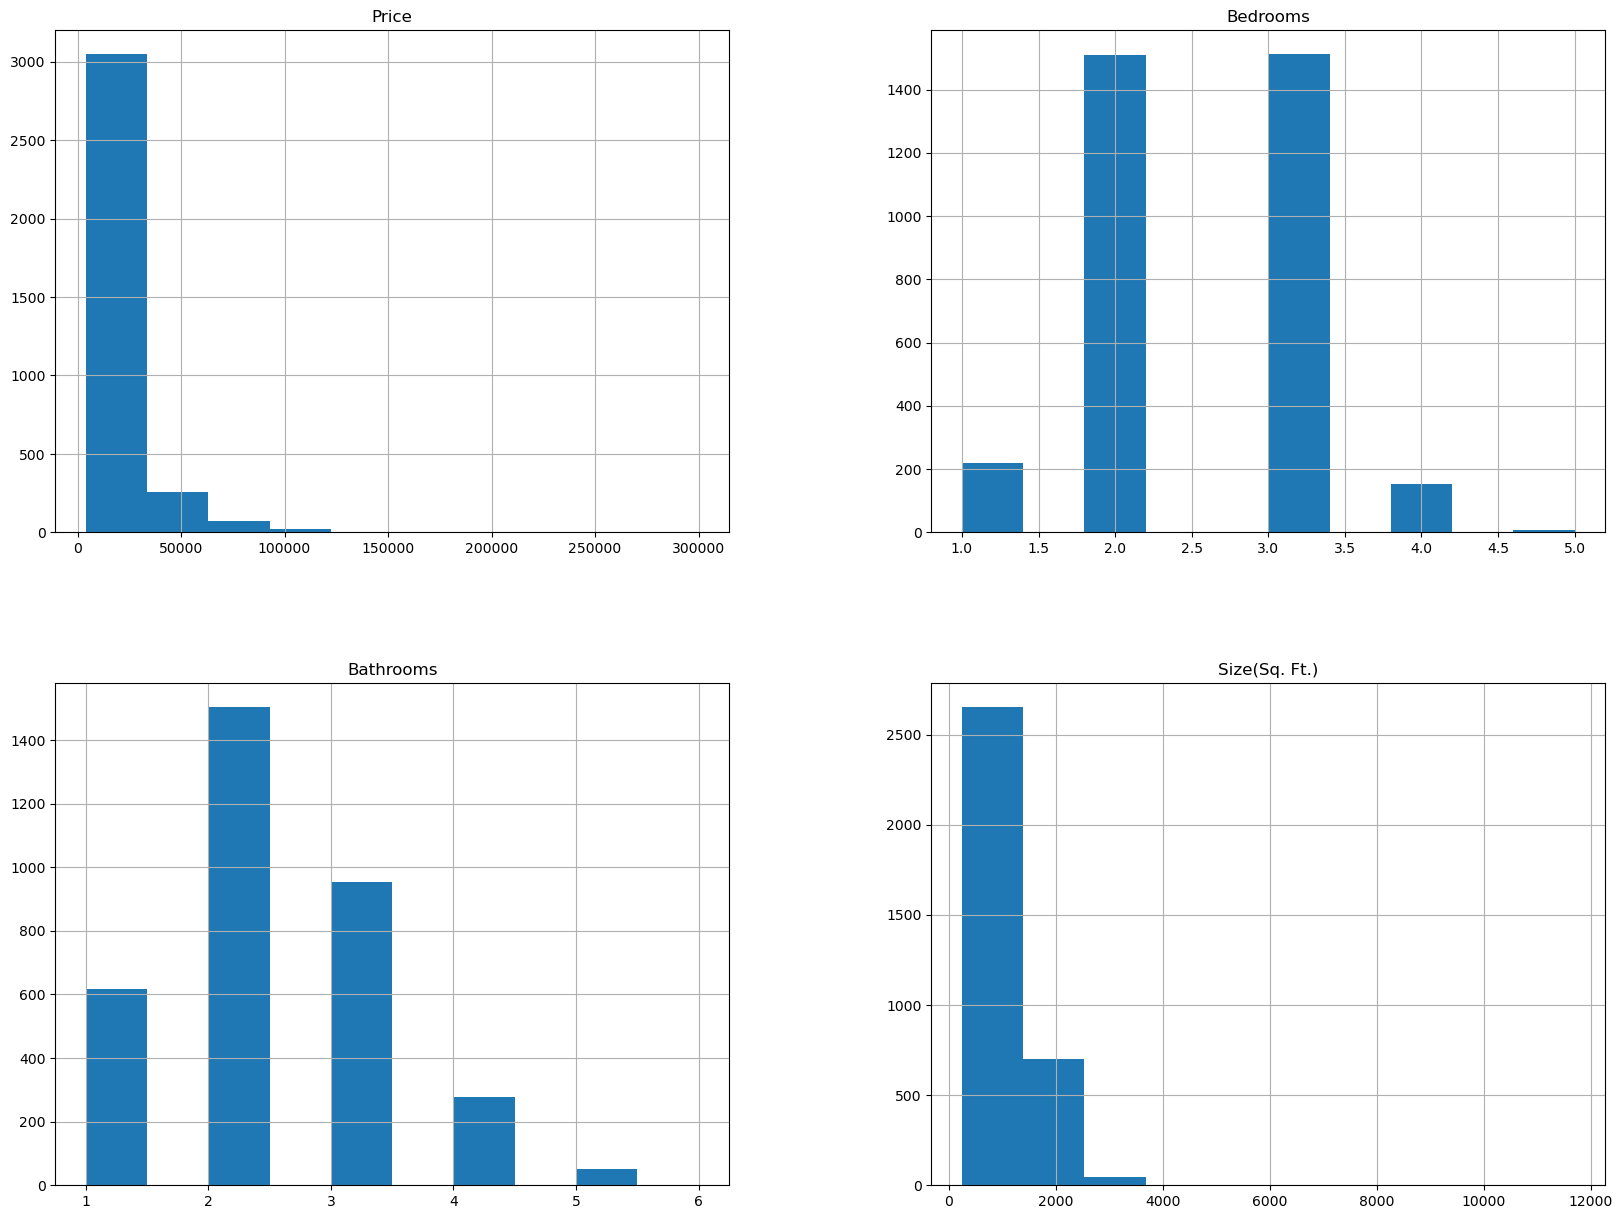

In [11]:
df.hist(figsize=(20, 15))

In [12]:
# Check for outliers and how to remove them
from scipy.stats import zscore
numeric_columns = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_columns]))
outliers_mask = (z_scores < 3).all(axis=1)  # Adjust the threshold as needed (e.g., 3)
df = df[outliers_mask]
df

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,10500,Section 11,Mirpur,Dhaka,Room,2,2,650,No,Yes,Yes,No,North,No,No,Yes,2018
3500,25000,Block G,Bashundhara R/A,Dhaka,Apartment,3,3,1500,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
3501,14000,Shahinbag,Tejgaon,Dhaka,Apartment,2,1,600,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
3502,40000,Block F,Lalmatia,Dhaka,Apartment,3,3,1650,Yes,Yes,Yes,Yes,South,No,Yes,Yes,2016


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'Size(Sq. Ft.)'}>],
       [<Axes: title={'center': 'Rent Year'}>, <Axes: >]], dtype=object)

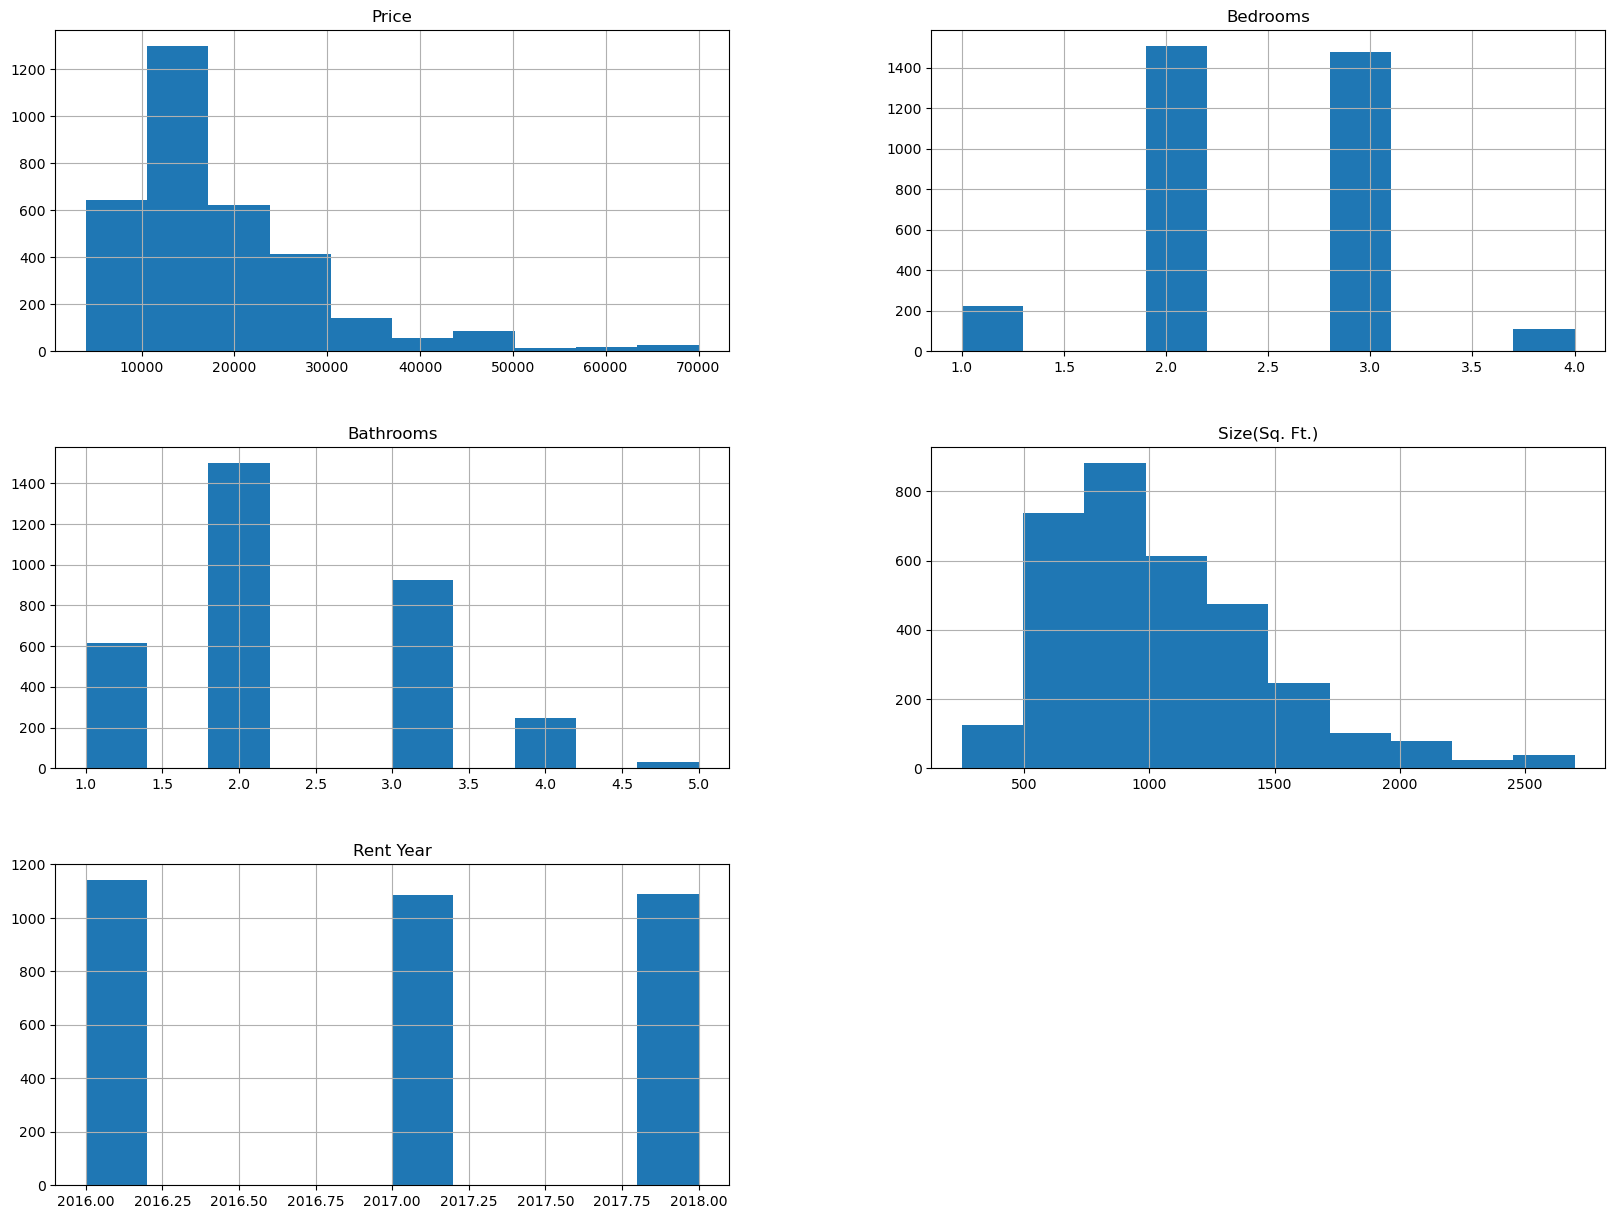

In [216]:
df.hist(figsize=(20, 15))

## Categorical variables distribution

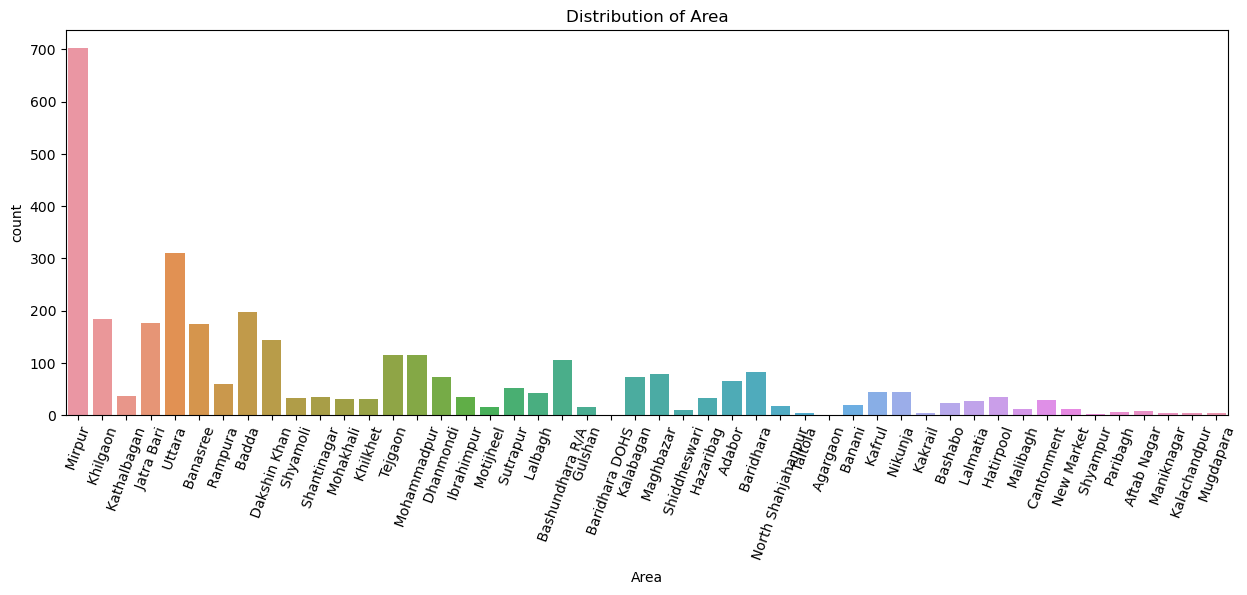

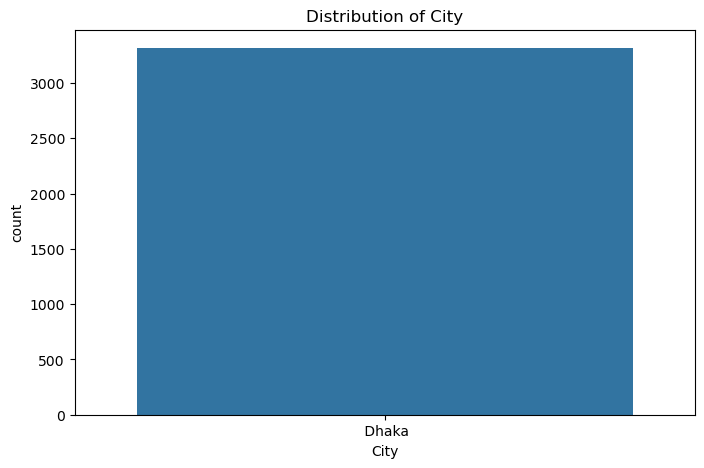

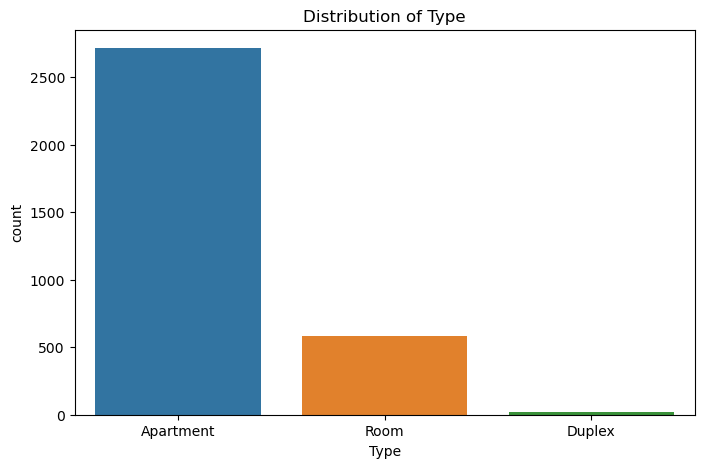

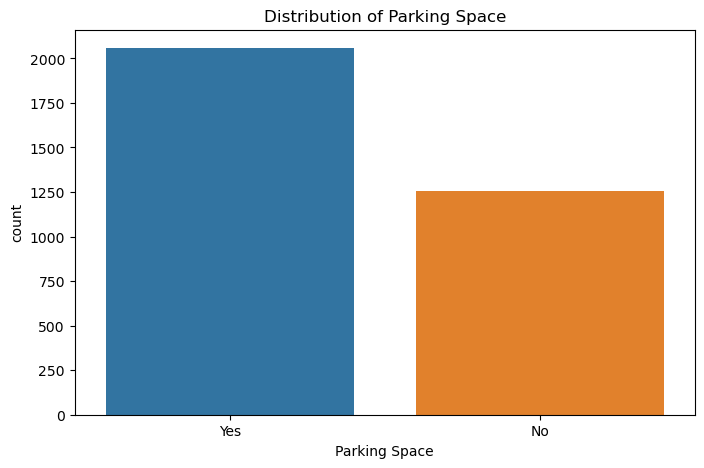

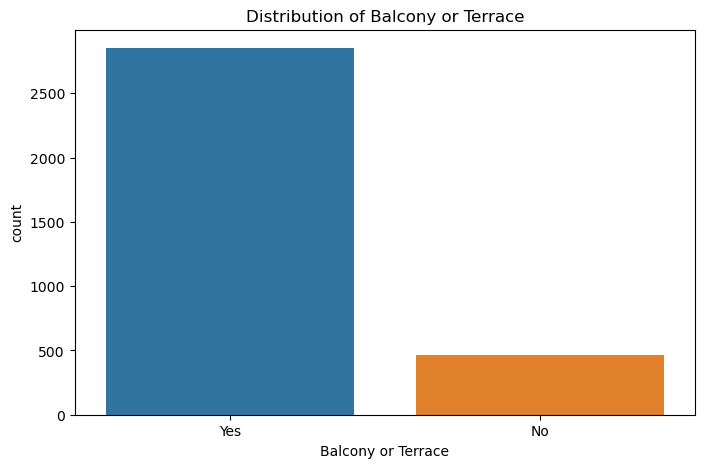

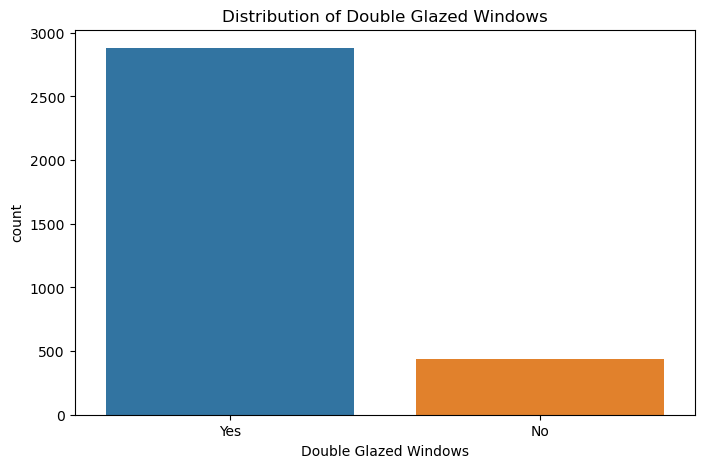

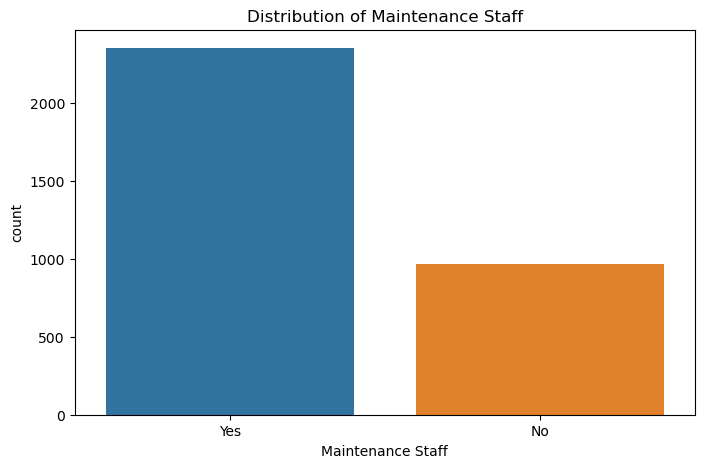

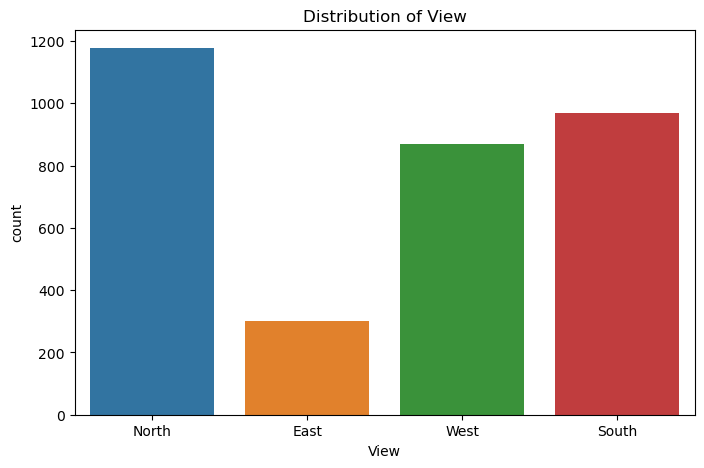

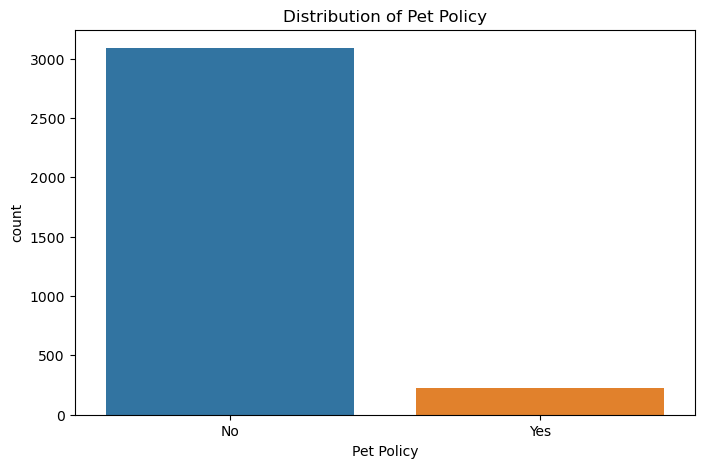

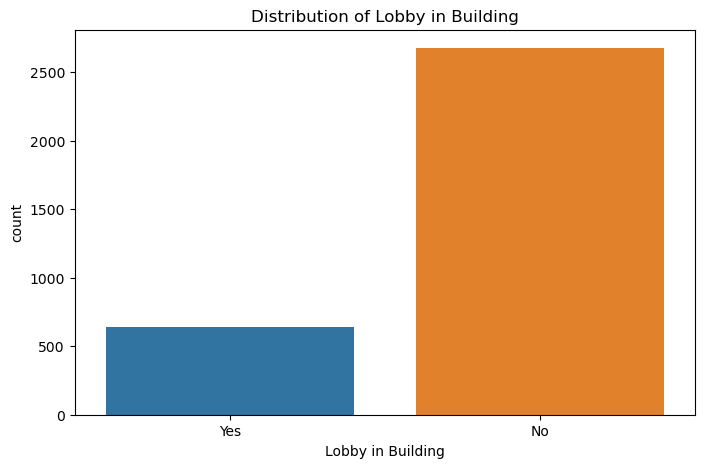

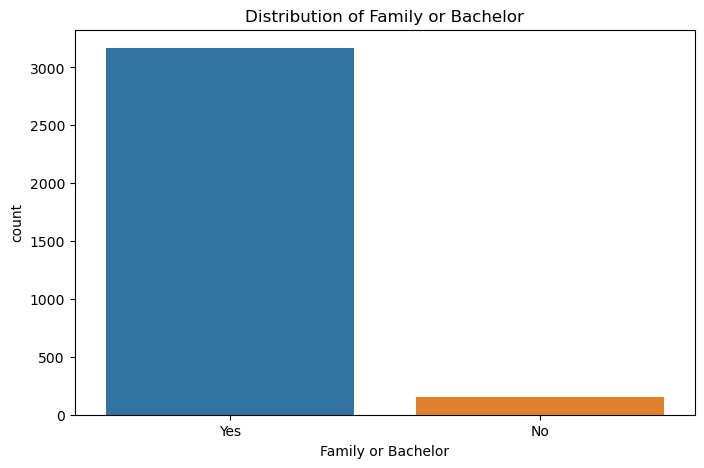

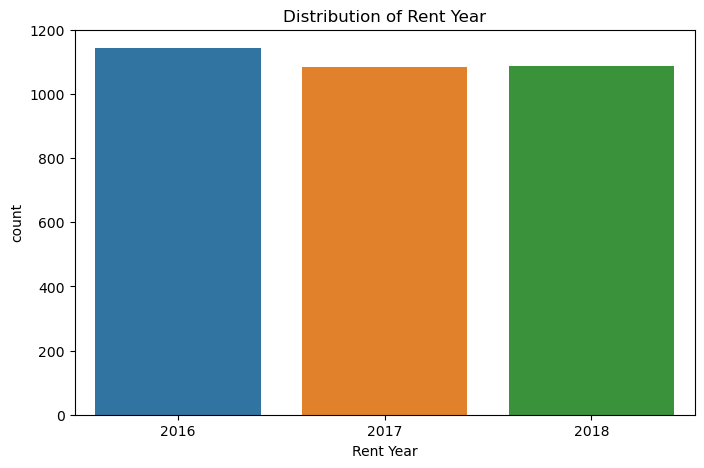

In [23]:
# Categorical variable distribution
categorical_columns = filter(lambda x: x not in ['Street'], df.select_dtypes(include=['object']).columns)

for column in categorical_columns:
	if column == 'Area':
		plt.figure(figsize=(15, 5))
		plt.xticks(rotation=70)
	else:
		plt.figure(figsize=(8, 5))
	sns.countplot(x=column, data=df)
	plt.title(f'Distribution of {column}')
	plt.show()

## Relationship between categorical and continuous variables

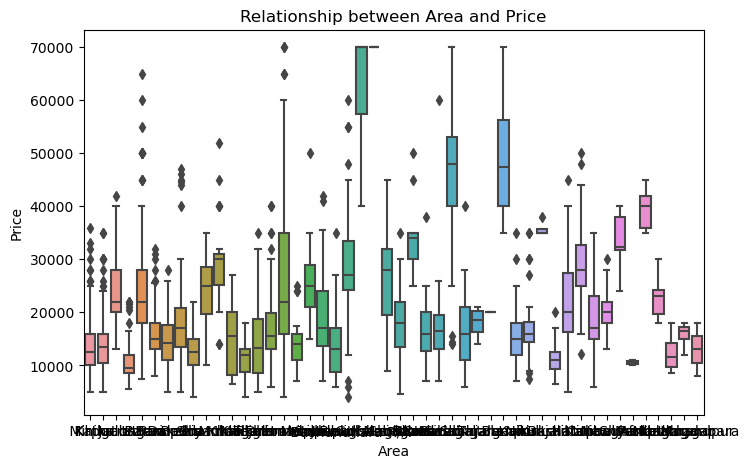

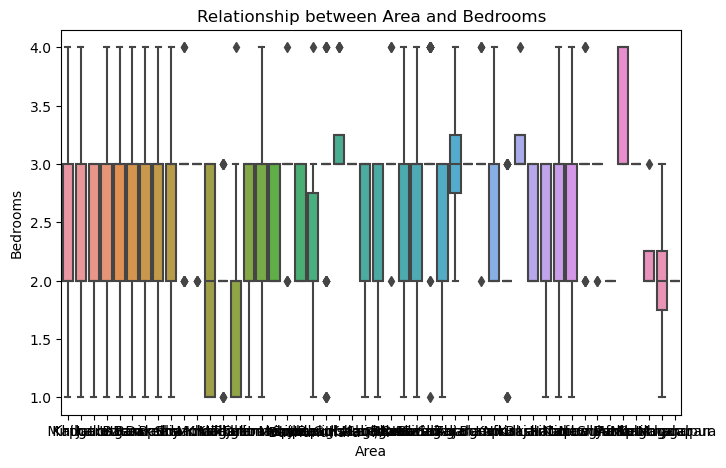

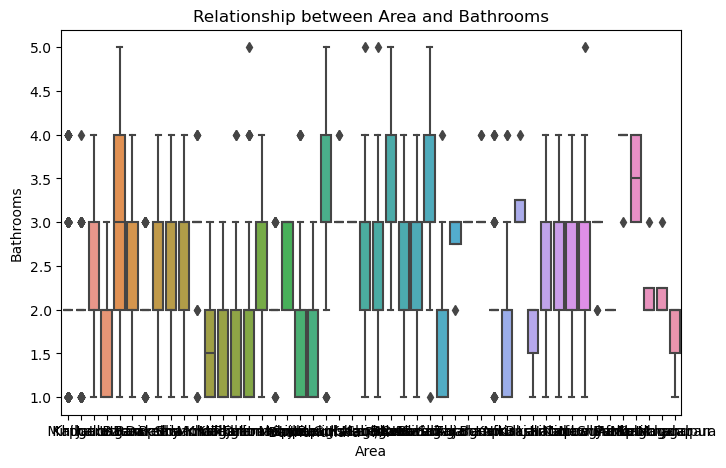

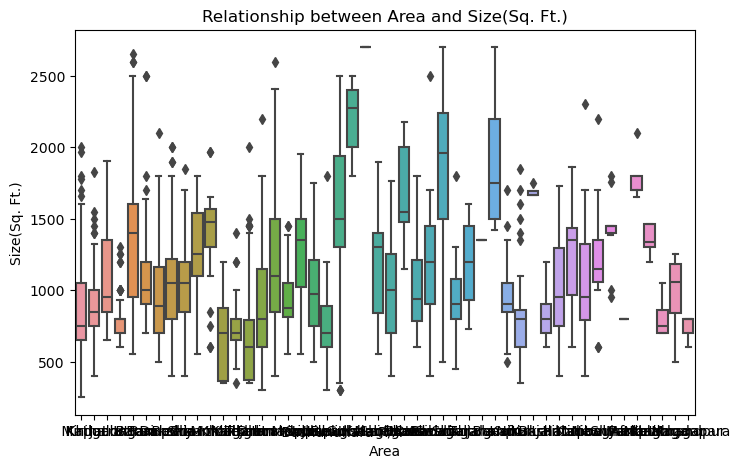

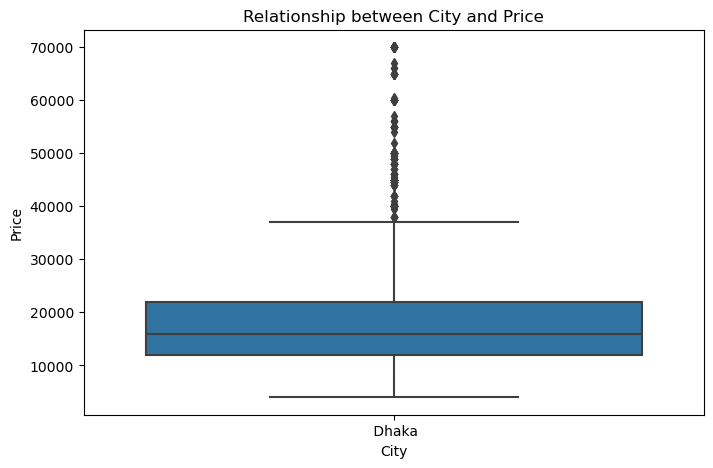

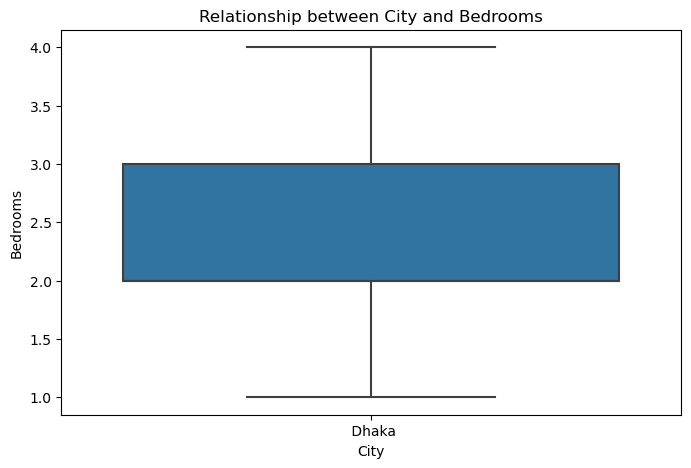

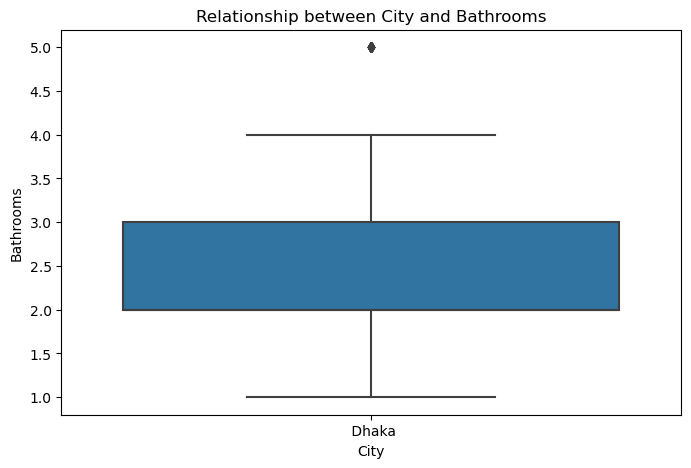

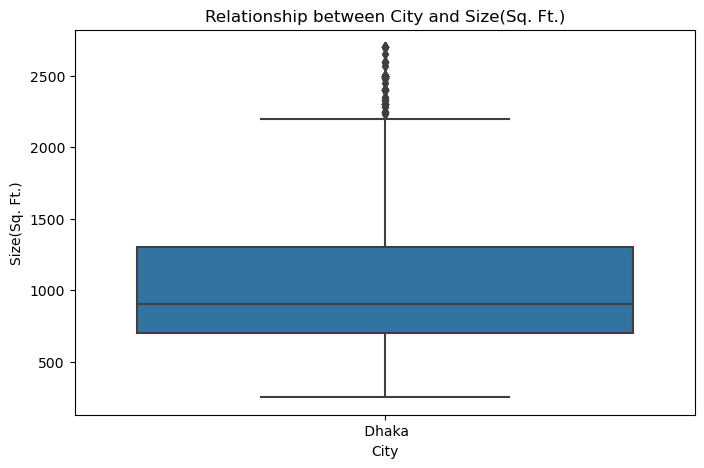

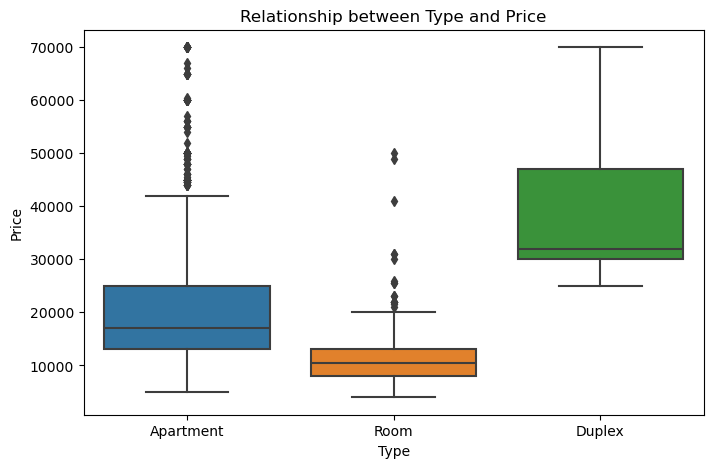

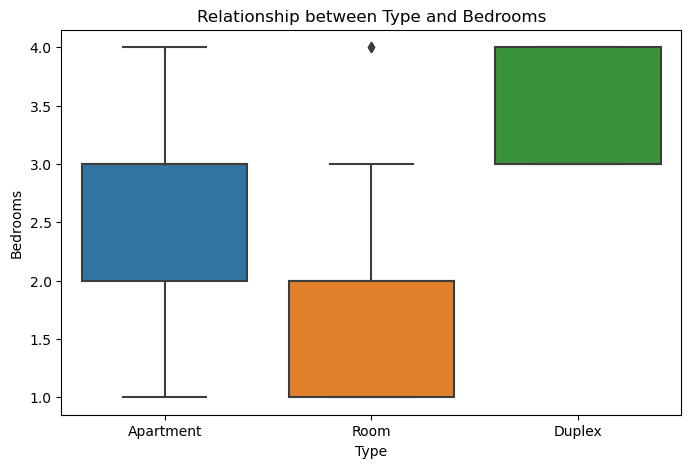

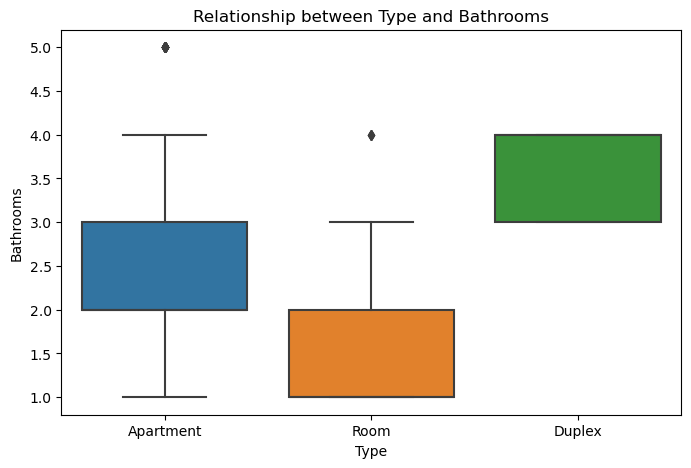

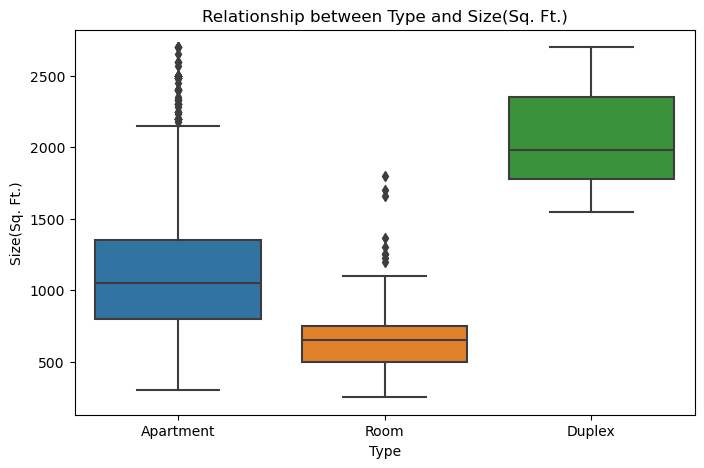

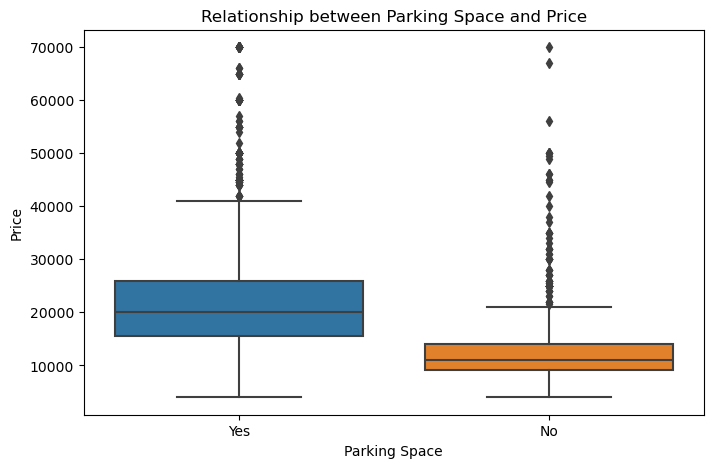

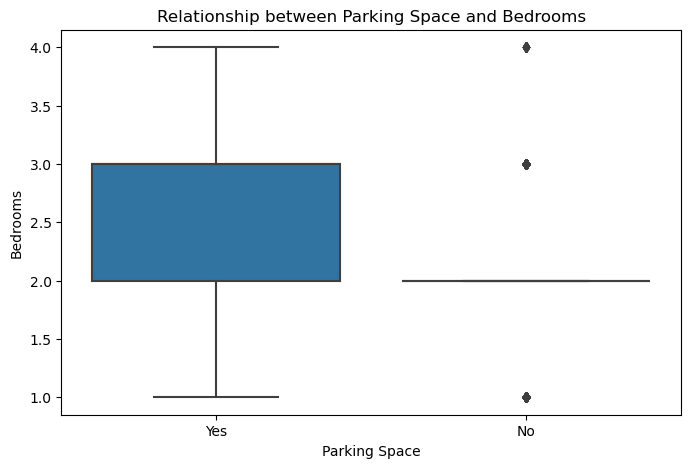

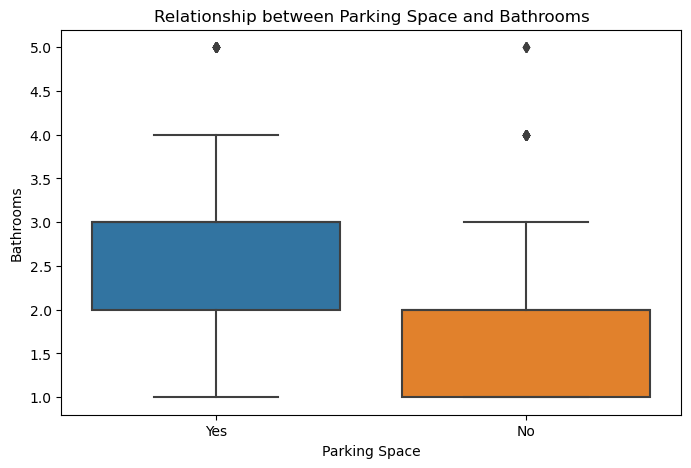

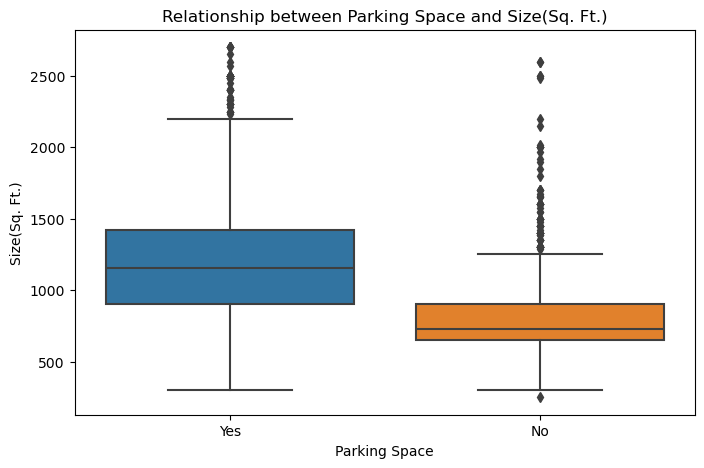

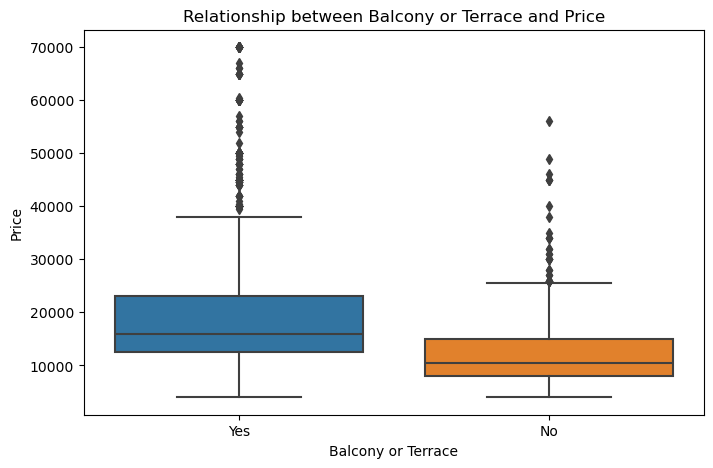

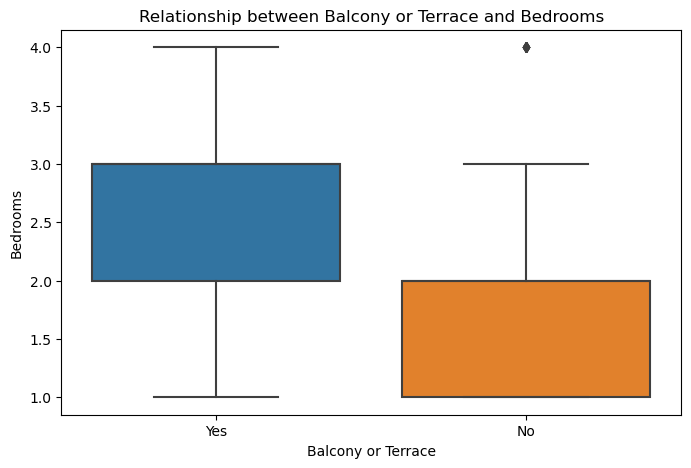

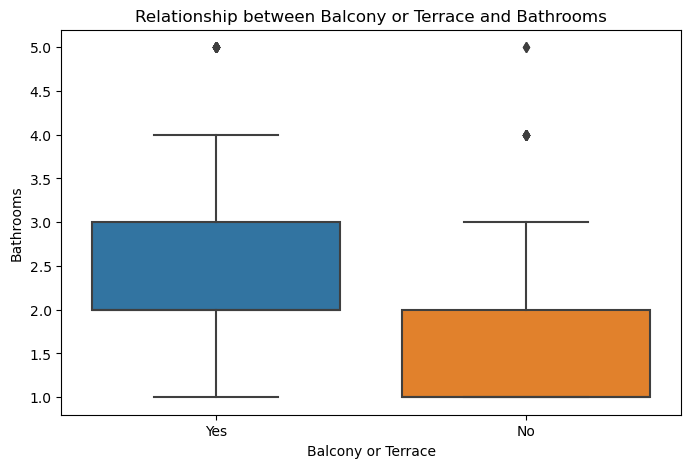

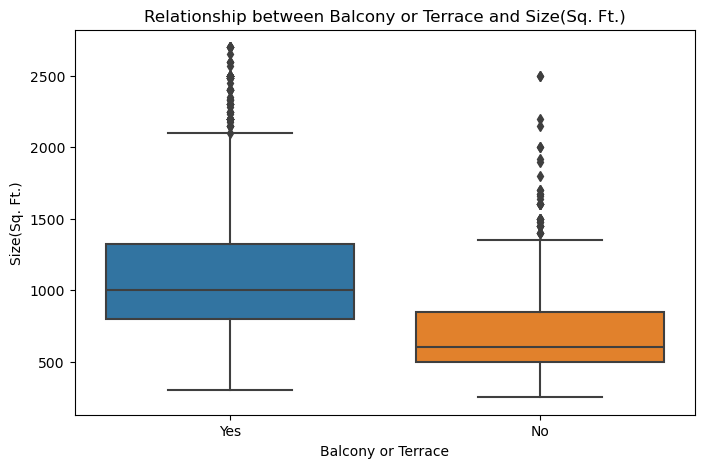

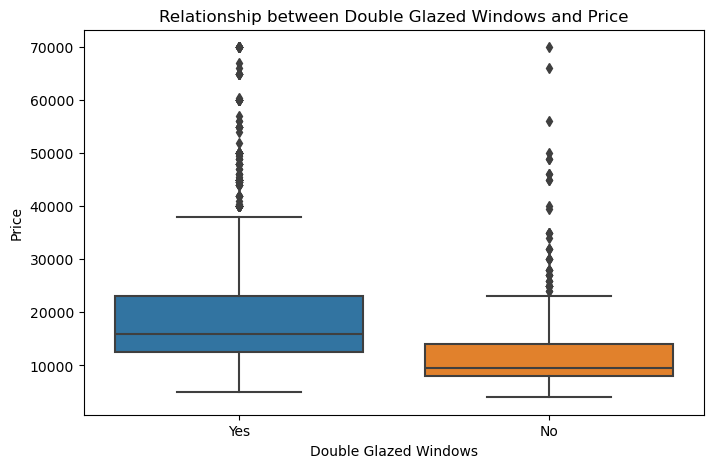

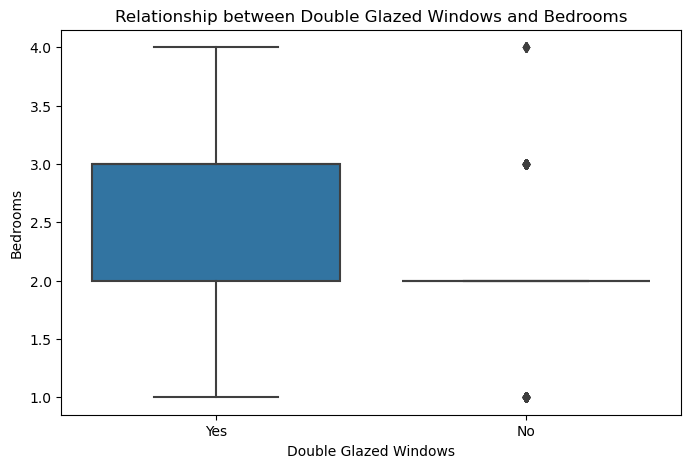

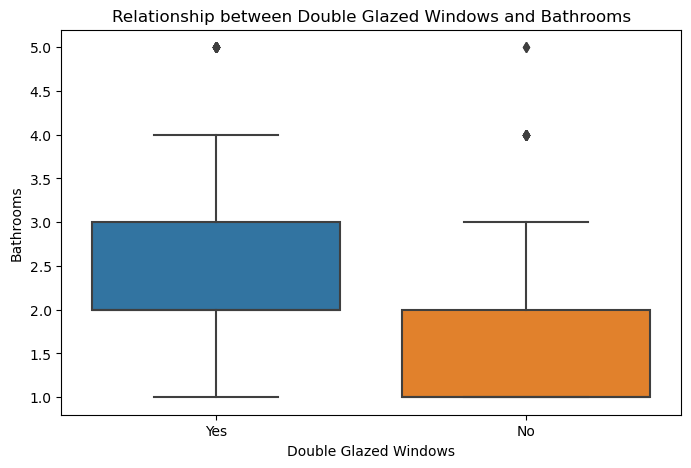

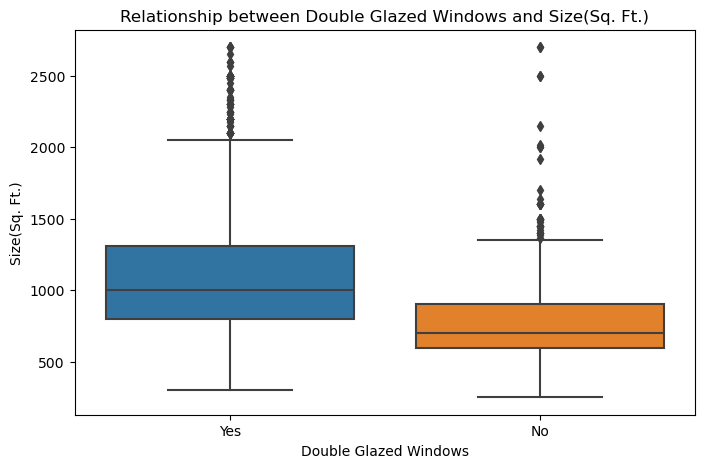

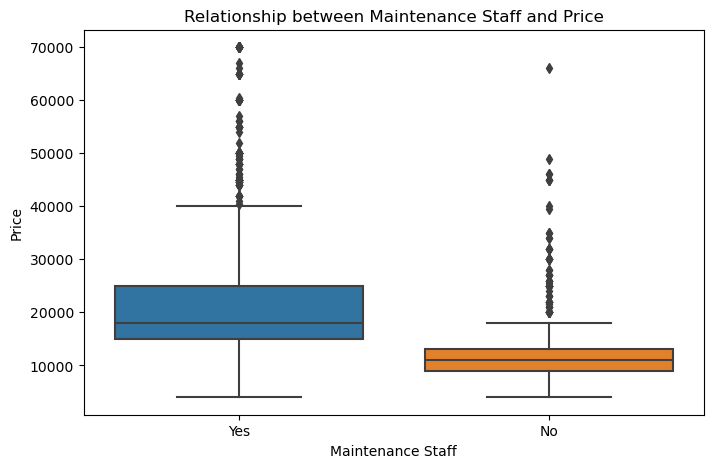

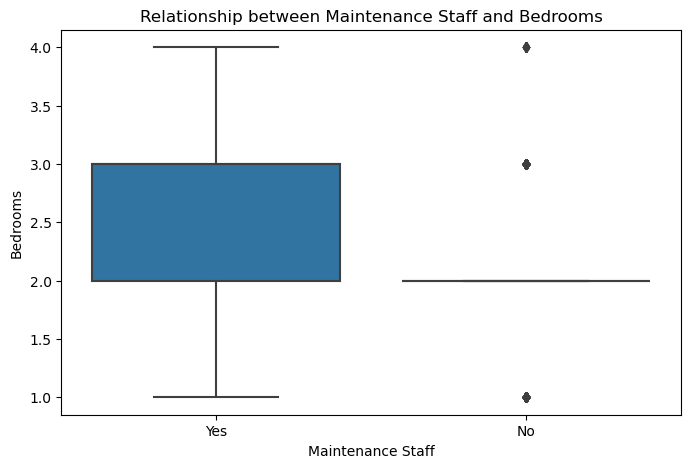

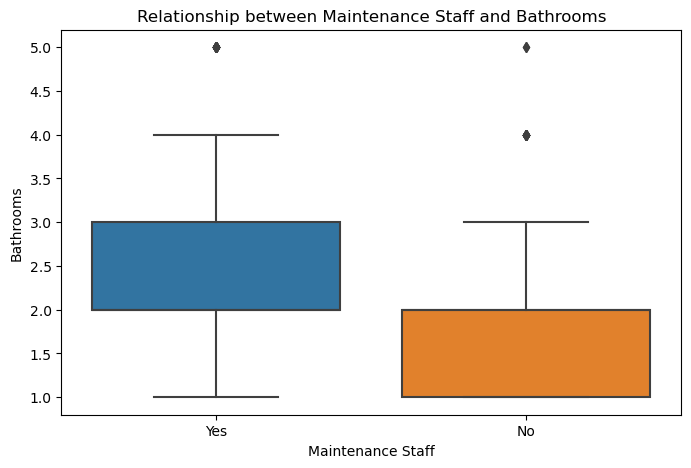

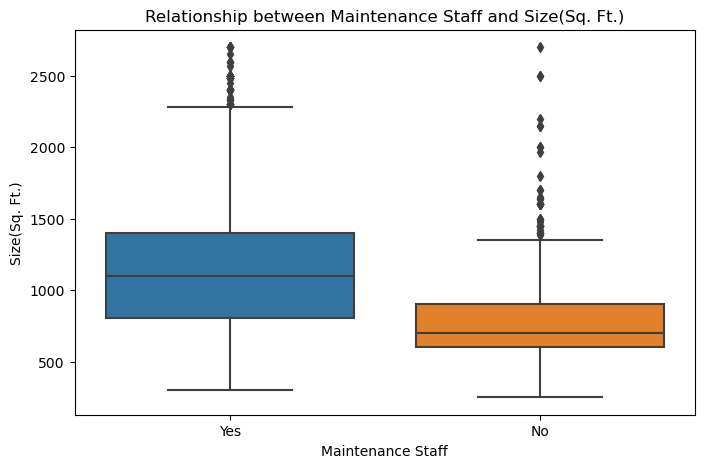

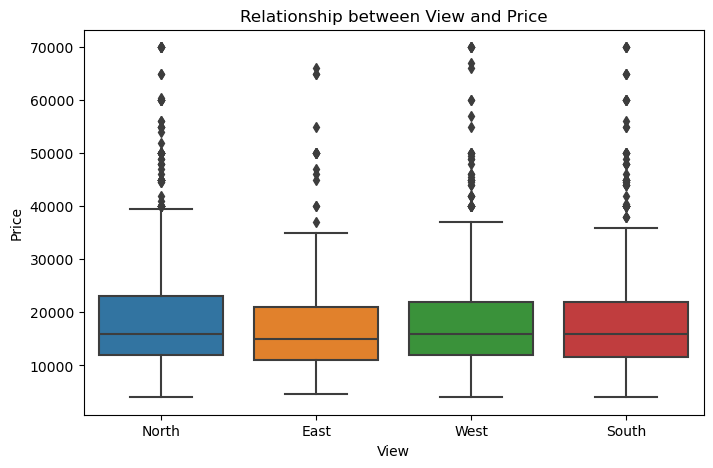

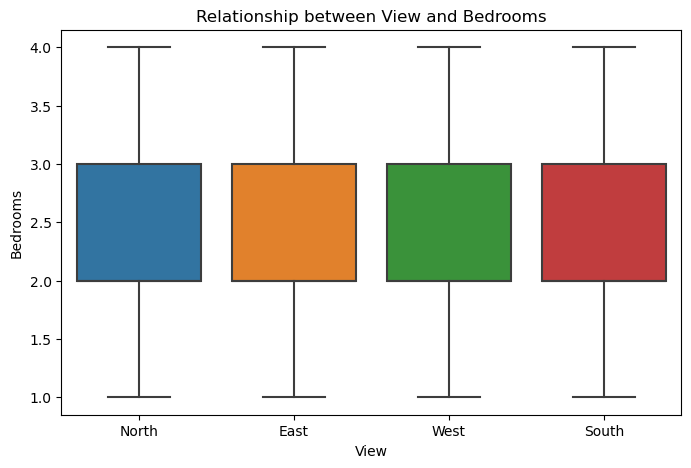

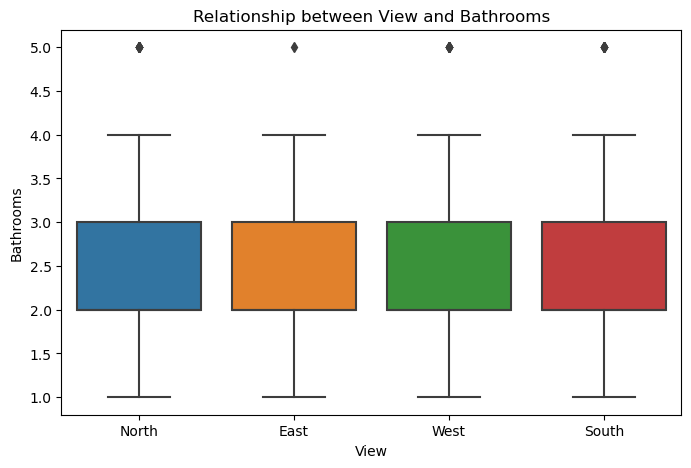

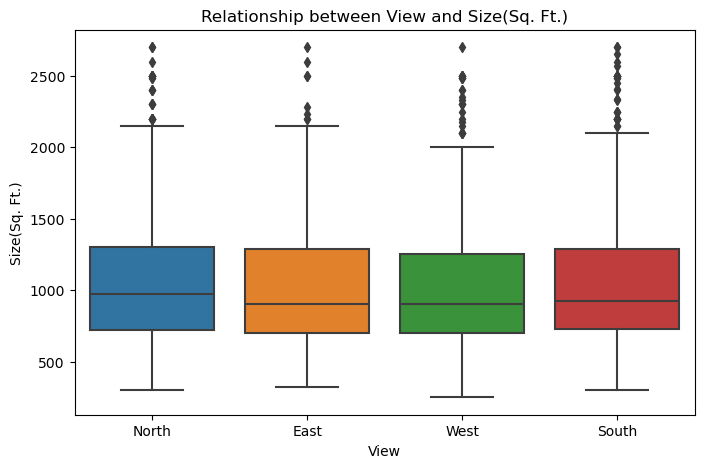

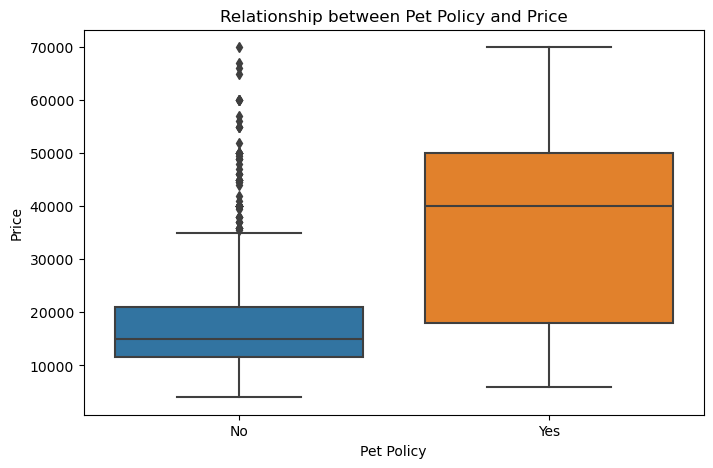

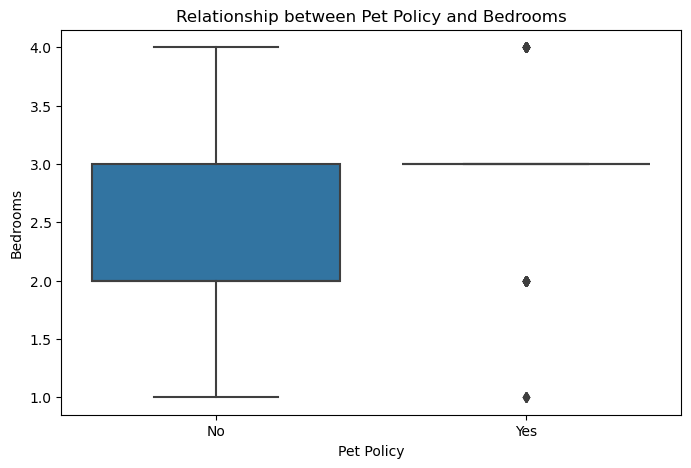

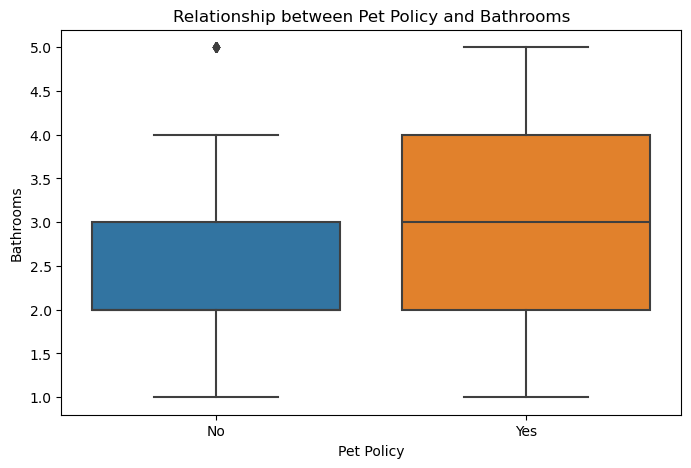

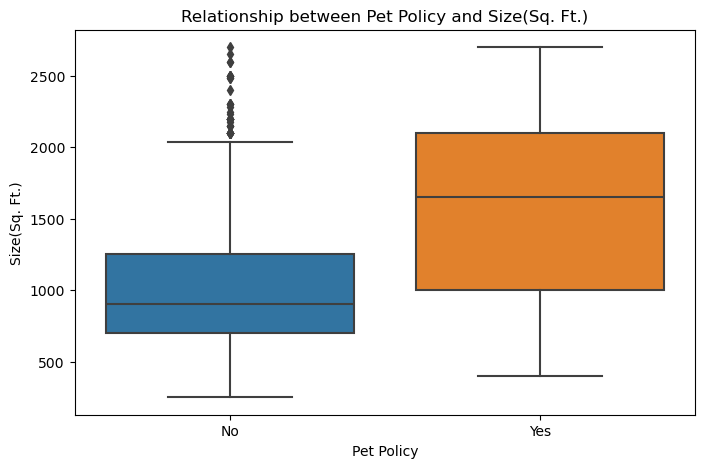

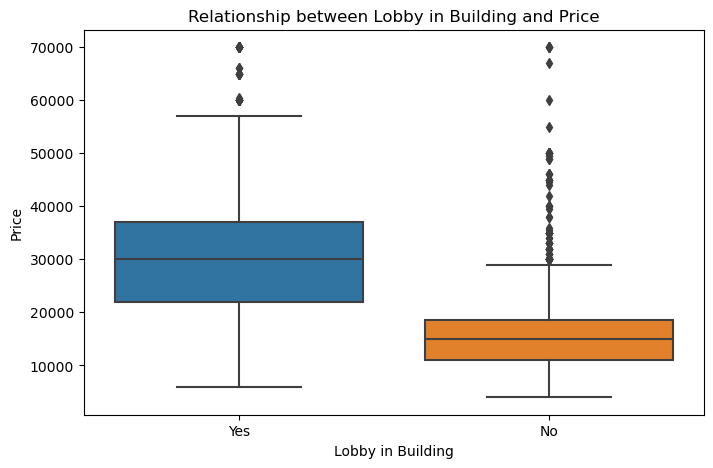

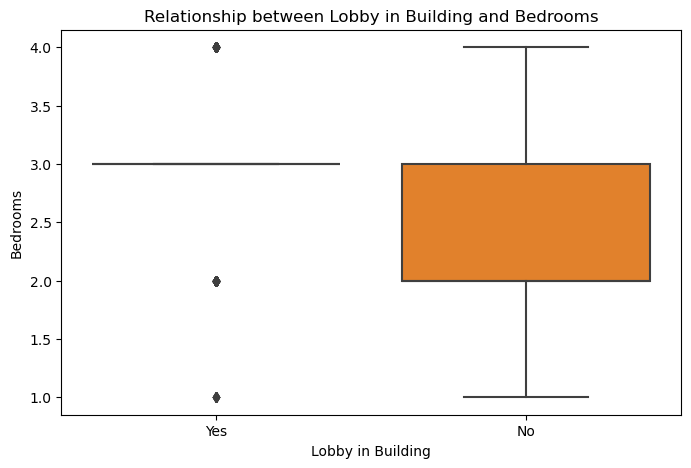

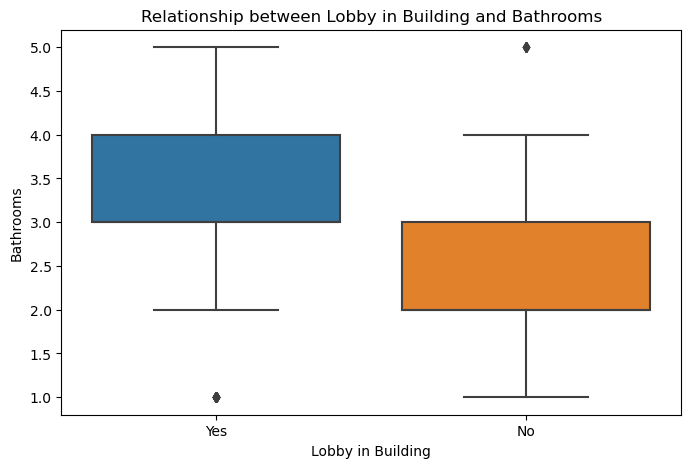

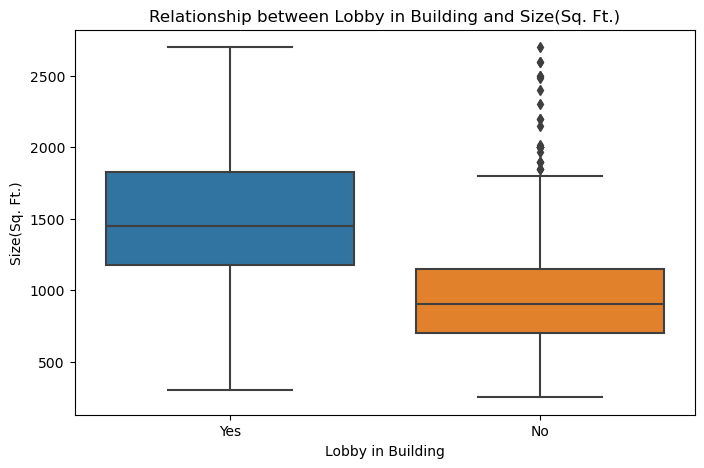

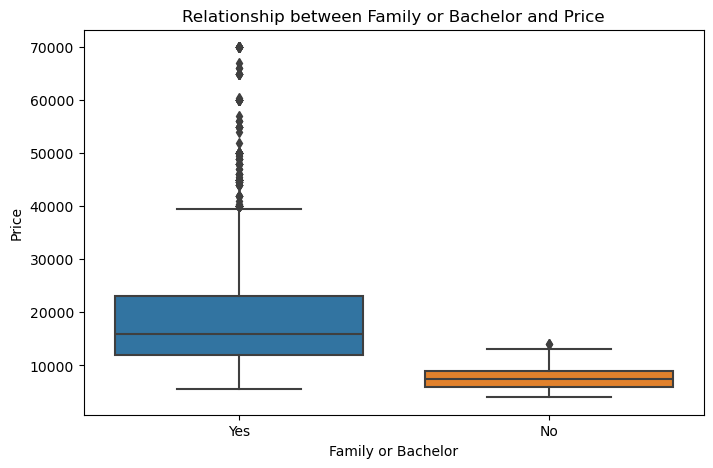

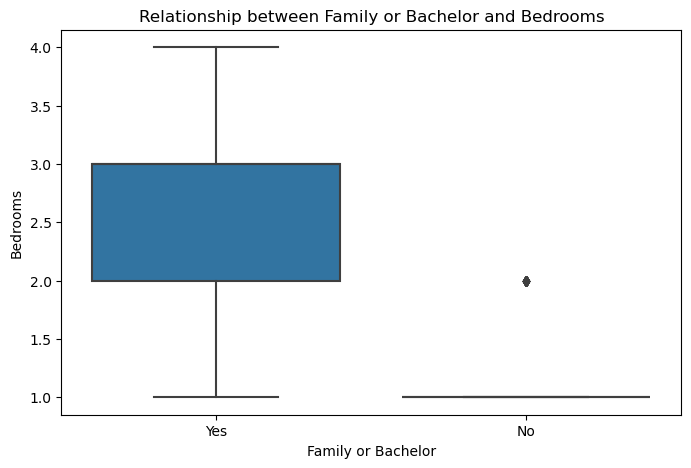

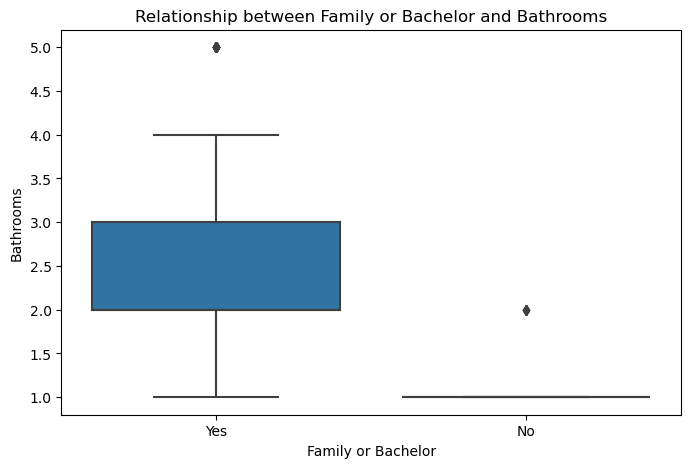

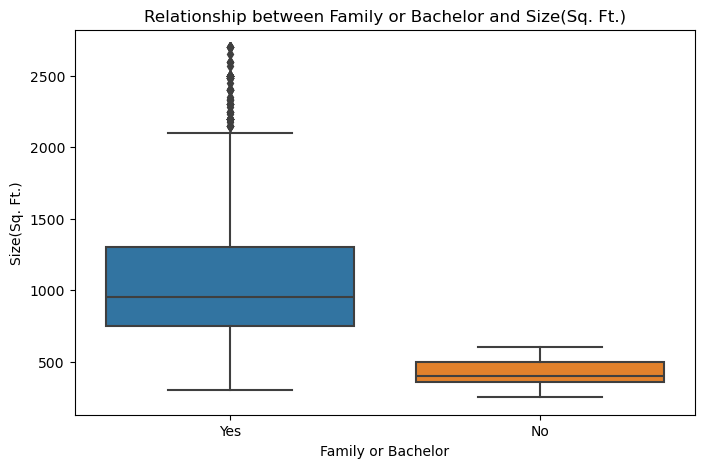

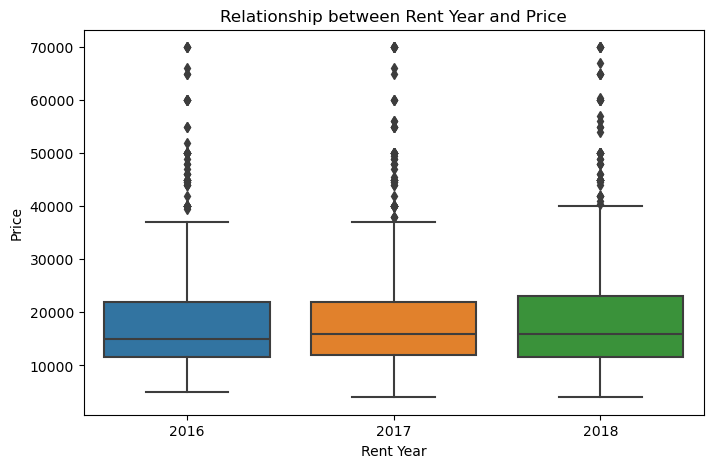

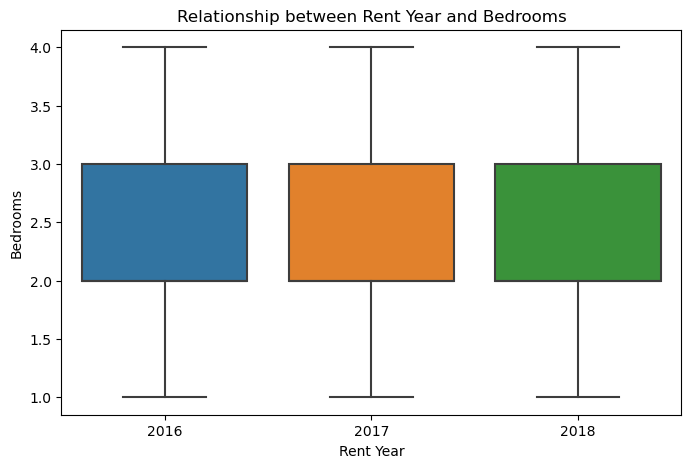

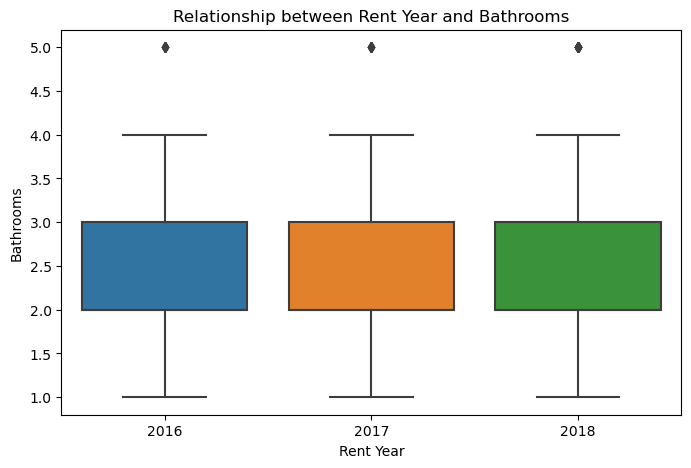

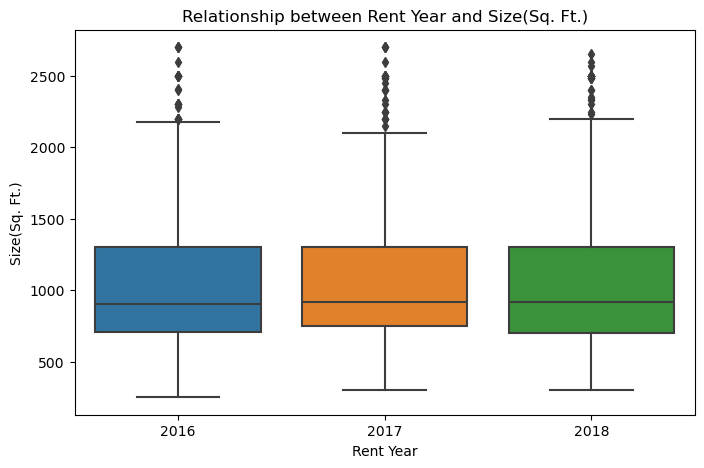

In [21]:
# Relationship between categorical and continuous variables
categorical_columns = categorical_columns = filter(lambda x: x not in ['Street'], df.select_dtypes(include=['object']).columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns

for cat_column in categorical_columns:
	for num_column in numeric_columns:
		plt.figure(figsize=(8, 5))
		sns.boxplot(x=cat_column, y=num_column, data=df)
		plt.title(f'Relationship between {cat_column} and {num_column}')
		plt.show()

## Correlation heatmaps

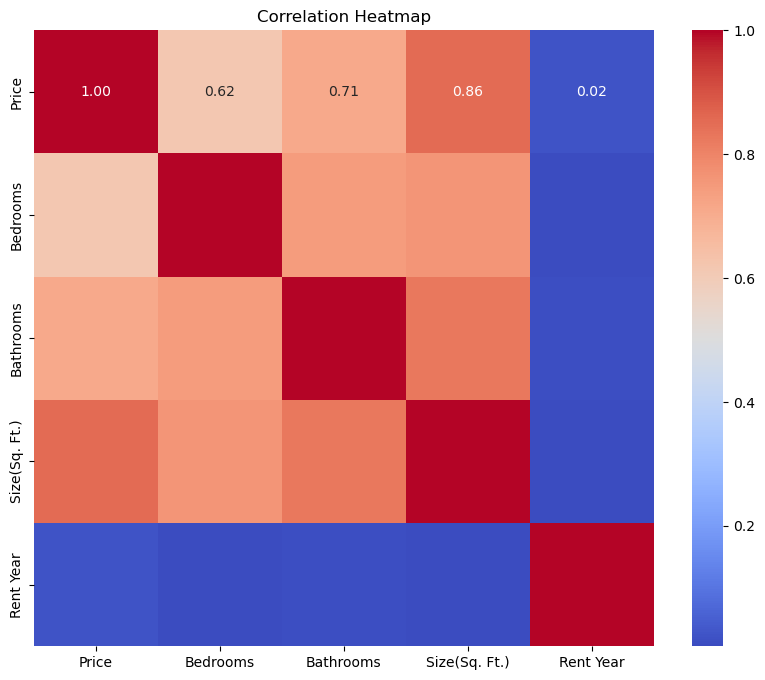

In [220]:
# Draw correlation using Pearson's Heat-map (Numeric Columns)
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [243]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Street', 'Area', 'City', 'Type', 'Parking Space', 'Balcony or Terrace',
       'Double Glazed Windows', 'Maintenance Staff', 'View', 'Pet Policy',
       'Lobby in Building', 'Family or Bachelor'],
      dtype='object')

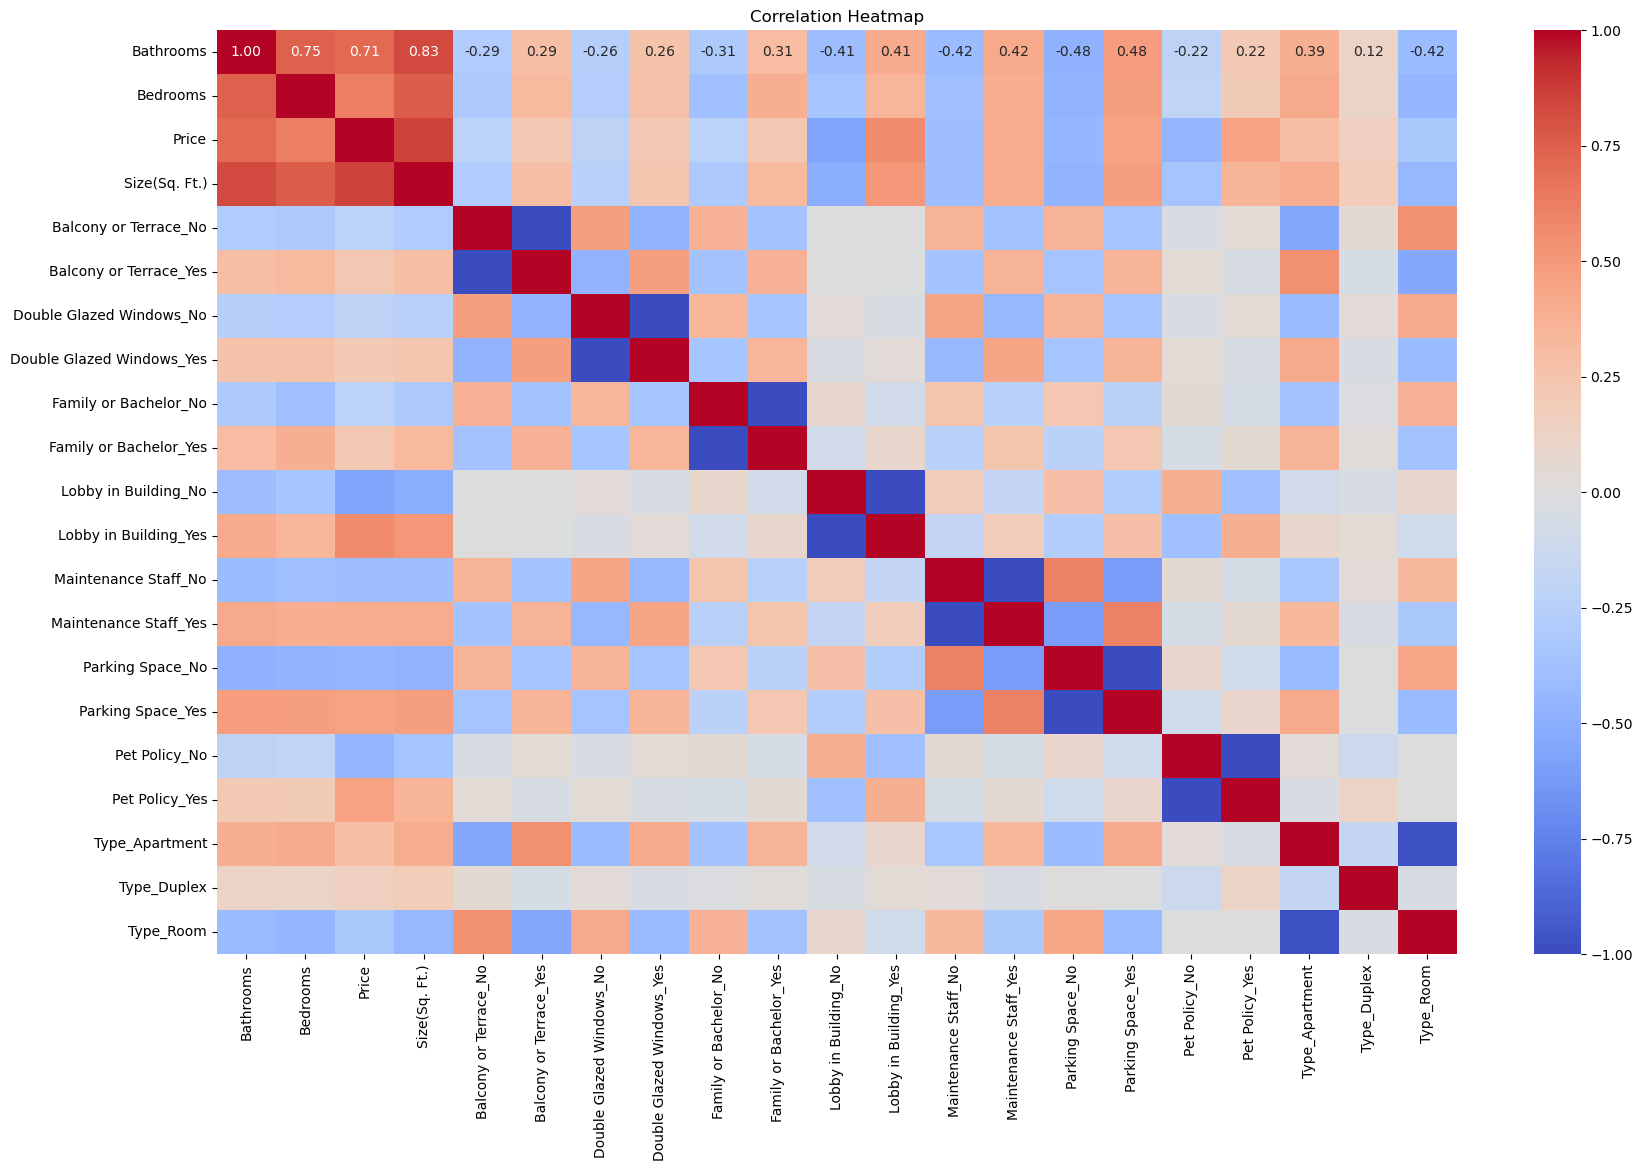

In [36]:
# Draw correlation using Pearson's Heat-map (All columns)
# Create a new DataFrame with one-hot encoding for categorical columns
df_selectedColumns = df.loc[:, df.columns.difference(['City', 'Area', 'Street', 'Rent Year', 'View'])];
df_encoded = pd.get_dummies(df_selectedColumns)
# Calculate correlation matrix
correlation_matrix = df_encoded.corr()
# Plot correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Model Validations

In [663]:
df

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,10500,Section 11,Mirpur,Dhaka,Room,2,2,650,No,Yes,Yes,No,North,No,No,Yes,2018
3500,25000,Block G,Bashundhara R/A,Dhaka,Apartment,3,3,1500,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
3501,14000,Shahinbag,Tejgaon,Dhaka,Apartment,2,1,600,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
3502,40000,Block F,Lalmatia,Dhaka,Apartment,3,3,1650,Yes,Yes,Yes,Yes,South,No,Yes,Yes,2016


In [185]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder 
df_encoded = df.copy()
labelencoder= LabelEncoder()
for column in df_encoded:
	if (df_encoded[column].dtype == 'object'):
		df_encoded[column] = labelencoder.fit_transform(df_encoded[column])
df_encoded

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,226,30,0,0,3,3,1120,1,1,1,1,1,0,1,1,1
1,12000,77,23,0,2,2,2,730,0,0,0,0,1,0,0,1,2
2,24000,71,22,0,0,3,2,1100,1,1,1,1,0,1,1,1,2
3,13720,60,17,0,2,2,2,930,0,0,1,1,0,0,0,1,1
4,32000,237,47,0,1,4,4,1965,1,1,1,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,10500,223,30,0,2,2,2,650,0,1,1,0,1,0,0,1,2
3500,25000,45,9,0,0,3,3,1500,1,1,1,1,1,0,0,1,2
3501,14000,245,46,0,0,2,1,600,1,1,1,1,2,0,0,1,2
3502,40000,44,26,0,0,3,3,1650,1,1,1,1,2,0,1,1,0


In [43]:
# Feature Engineering
# df_encoded['rate_rooms_per_sqft'] = df_encoded['Bedrooms'] / df_encoded['Size(Sq. Ft.)']

In [186]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X = df_encoded.drop(['Price'], axis = 1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

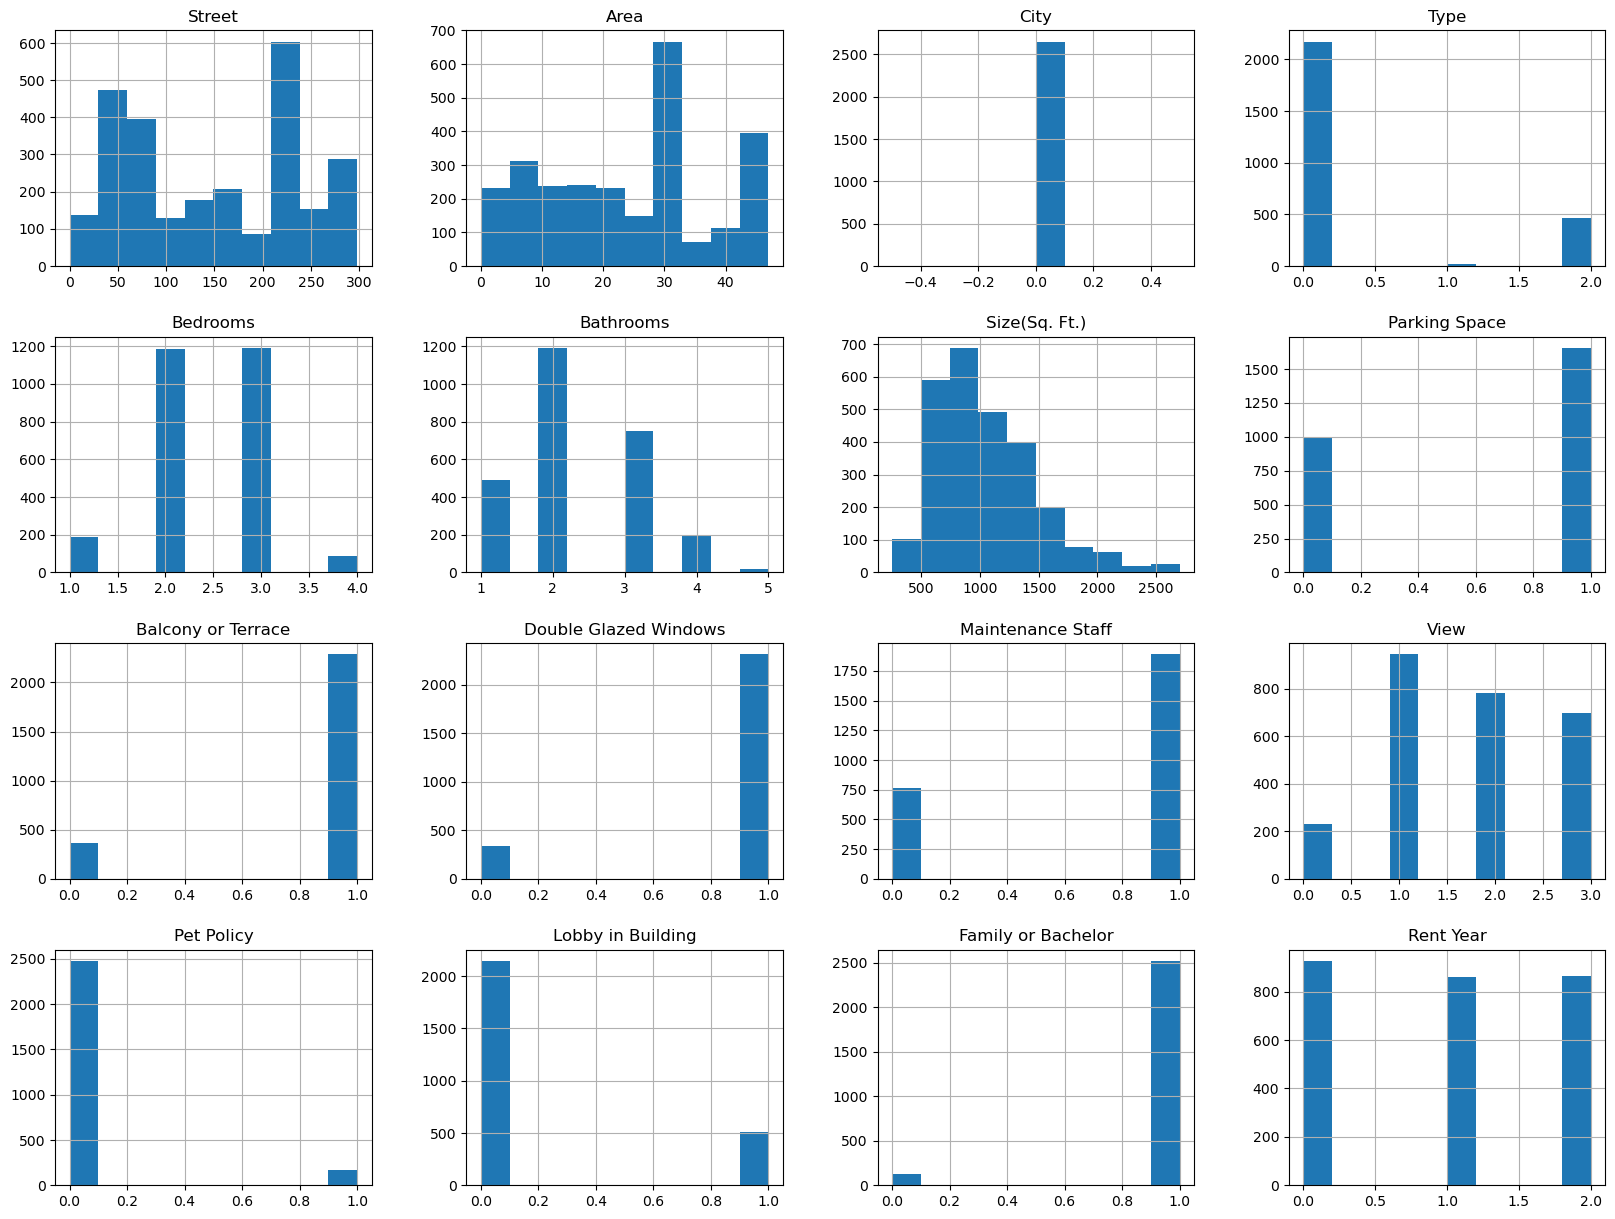

In [187]:
X_train.hist(figsize=(20, 15))
plt.show()

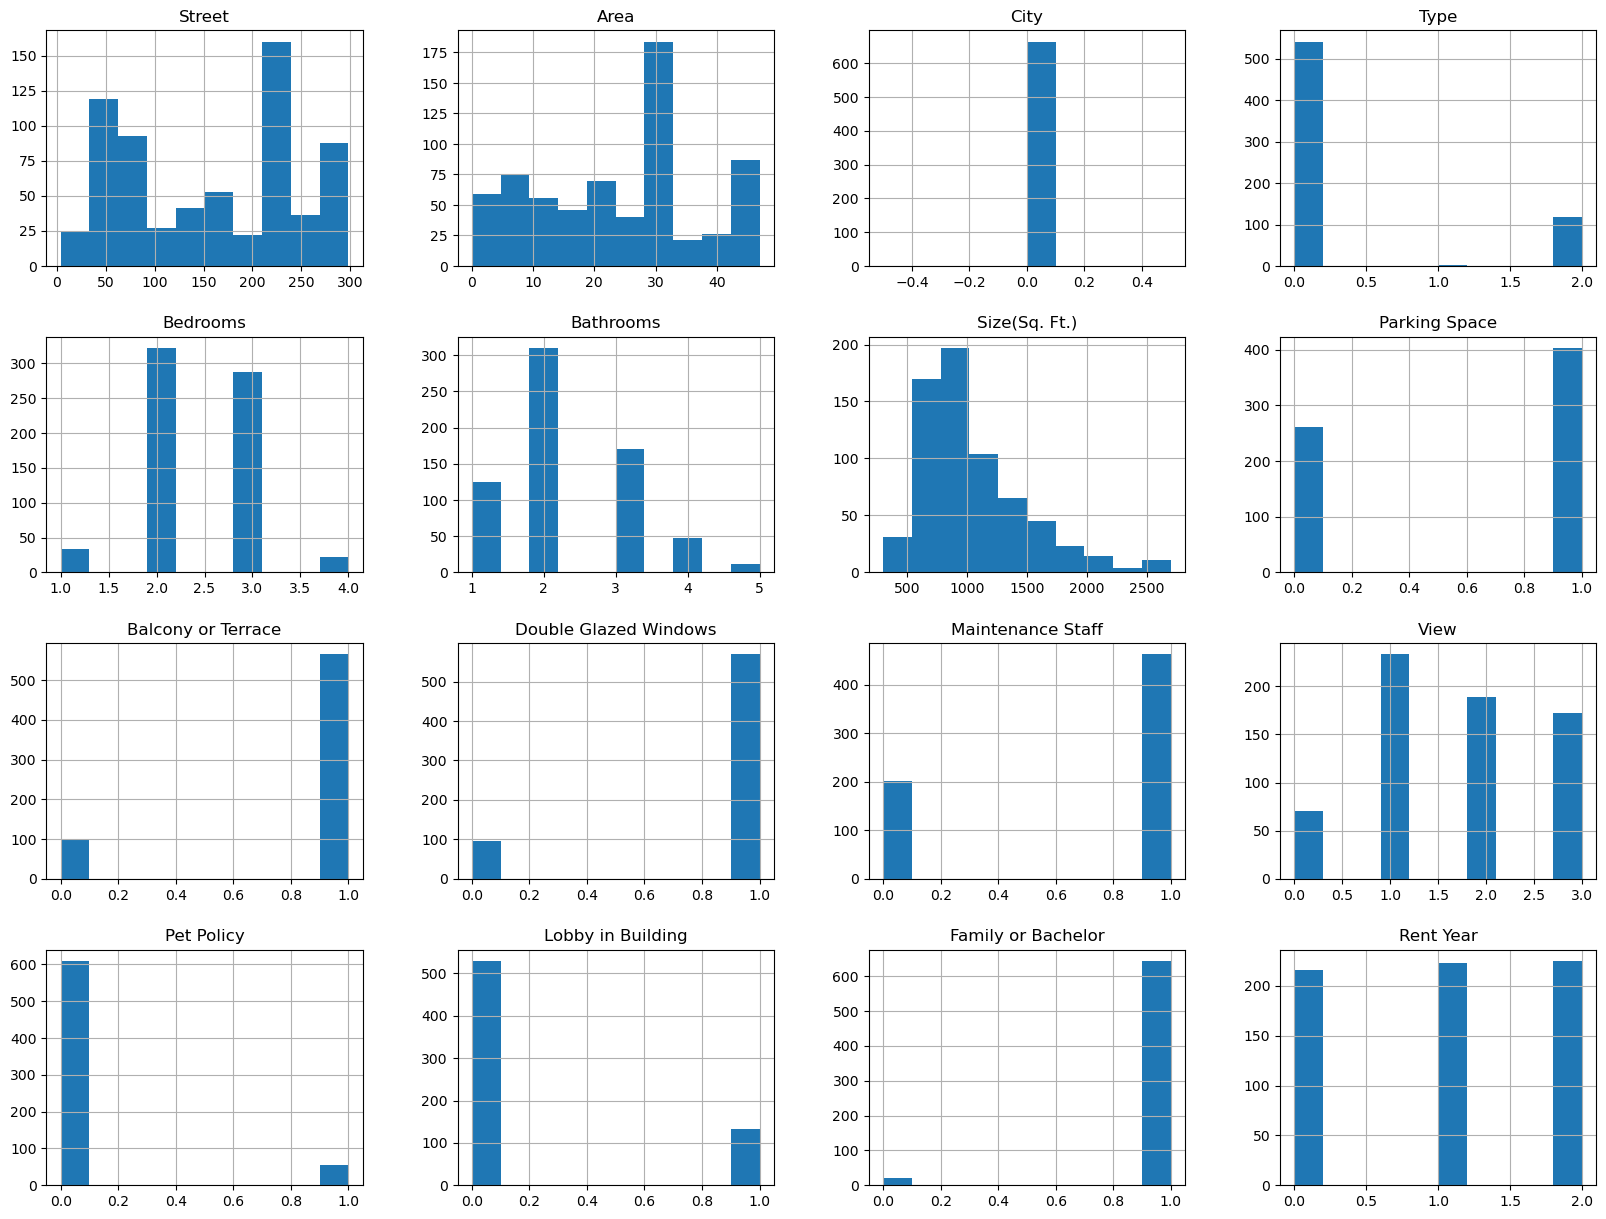

In [188]:
X_test.hist(figsize=(20, 15))
plt.show()

In [189]:
# Scaling the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
pd.DataFrame(X_train, columns=X_train.columns)

,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
559,158,20,0,0,2,2,800,0,1,1,1,0,0,0,1,0
1820,190,4,0,0,4,3,2200,1,1,1,1,1,1,1,1,0
1161,68,30,0,0,3,2,1000,1,1,1,1,2,0,0,1,2
1092,44,9,0,0,3,3,1500,1,1,1,1,2,0,0,1,1
3047,296,39,0,0,2,2,1250,0,1,1,1,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,38,40,0,0,3,4,1970,1,1,1,1,2,0,1,1,2
1190,43,5,0,0,2,1,800,1,1,1,1,1,0,0,1,1
1374,154,36,0,0,3,3,800,1,1,1,1,1,0,0,1,1
910,61,11,0,2,1,1,500,0,0,1,0,1,0,0,0,1


In [190]:
pd.DataFrame(X_train_scaled, columns=X_train.columns)

,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,0.100164,-0.294538,0.0,-0.467581,-0.658000,-0.307344,-0.578340,-1.288402,0.400131,0.384129,0.635545,-1.832471,-0.264171,-0.484987,0.226119,-1.188334
1,0.456495,-1.434436,0.0,-0.467581,2.312242,0.843893,2.723249,0.776155,0.400131,0.384129,0.635545,-0.775552,3.785430,2.061913,0.226119,-1.188334
2,-0.902019,0.417898,0.0,-0.467581,0.827121,-0.307344,-0.106685,0.776155,0.400131,0.384129,0.635545,0.281367,-0.264171,-0.484987,0.226119,1.247108
3,-1.169267,-1.078218,0.0,-0.467581,0.827121,0.843893,1.072455,0.776155,0.400131,0.384129,0.635545,0.281367,-0.264171,-0.484987,0.226119,0.029387
4,1.636843,1.059091,0.0,-0.467581,-0.658000,-0.307344,0.482885,-1.288402,0.400131,0.384129,0.635545,0.281367,-0.264171,-0.484987,0.226119,-1.188334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,-1.236079,1.130334,0.0,-0.467581,0.827121,1.995130,2.180845,0.776155,0.400131,0.384129,0.635545,0.281367,-0.264171,2.061913,0.226119,1.247108
2648,-1.180403,-1.363193,0.0,-0.467581,-0.658000,-1.458581,-0.578340,0.776155,0.400131,0.384129,0.635545,-0.775552,-0.264171,-0.484987,0.226119,0.029387
2649,0.055622,0.845360,0.0,-0.467581,0.827121,0.843893,-0.578340,0.776155,0.400131,0.384129,0.635545,-0.775552,-0.264171,-0.484987,0.226119,0.029387
2650,-0.979966,-0.935731,0.0,2.162374,-2.143122,-1.458581,-1.285824,-1.288402,-2.499180,0.384129,-1.573453,-0.775552,-0.264171,-0.484987,-4.422459,0.029387


# Evaluating Models

In [191]:
# Function to display dataframes side by side
from IPython.display import HTML

def displayDataFramesSideBySide(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 2em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

In [192]:
# Function to display model evaluation metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
def displayModelMetrics(X_test, y_test, y_pred, model_regr):
	mae = mean_absolute_error(y_test, y_pred)
	rmse = np.sqrt(mean_squared_error(y_test, y_pred)),
	cross_scores = cross_val_score(model_regr, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
	cross_val_scores = np.sqrt(-cross_scores)
	return pd.DataFrame({ 
		"Accuracy": model_regr.score(X_test, y_test),
		"RMSE": rmse, 
		"MAE": mae,
		"Mean": cross_val_scores.mean(),
		"Std Deviation": cross_val_scores.std()
	}).T

In [193]:
# Function to display original values vs predicted values
def displayOriginalVsPredicted(y_test, y_pred):
	y_test_values = y_test[:5]
	y_pred_values = y_pred[:5]
	y_difference = y_test_values - y_pred_values
	return pd.DataFrame({ 
		"y_test": y_test_values, 
		"y_pred": y_pred_values, 
		"y_difference": y_difference 
	})

In [194]:
# Display model evaluations and original vs predicted values
def DisplayModelEvaluation(X_test, y_test, y_pred, model_regr):
	modelEvaluation = displayModelMetrics(X_test, y_test, y_pred, model_regr)
	modelOriginalVsPredicted = displayOriginalVsPredicted(y_test, y_pred)
	displayDataFramesSideBySide(modelEvaluation, modelOriginalVsPredicted)

In [241]:
# Stochastic Gradient Descent regressor
from sklearn.linear_model import SGDRegressor
sgd_regr = SGDRegressor(max_iter=1000, random_state=1)
sgd_regr.fit(X_train_scaled, y_train)
sgd_regr_pred = sgd_regr.predict(X_test_scaled)
DisplayModelEvaluation(X_test_scaled, y_test, sgd_regr_pred, sgd_regr)

In [260]:
X_test_scaled.shape[1]

16

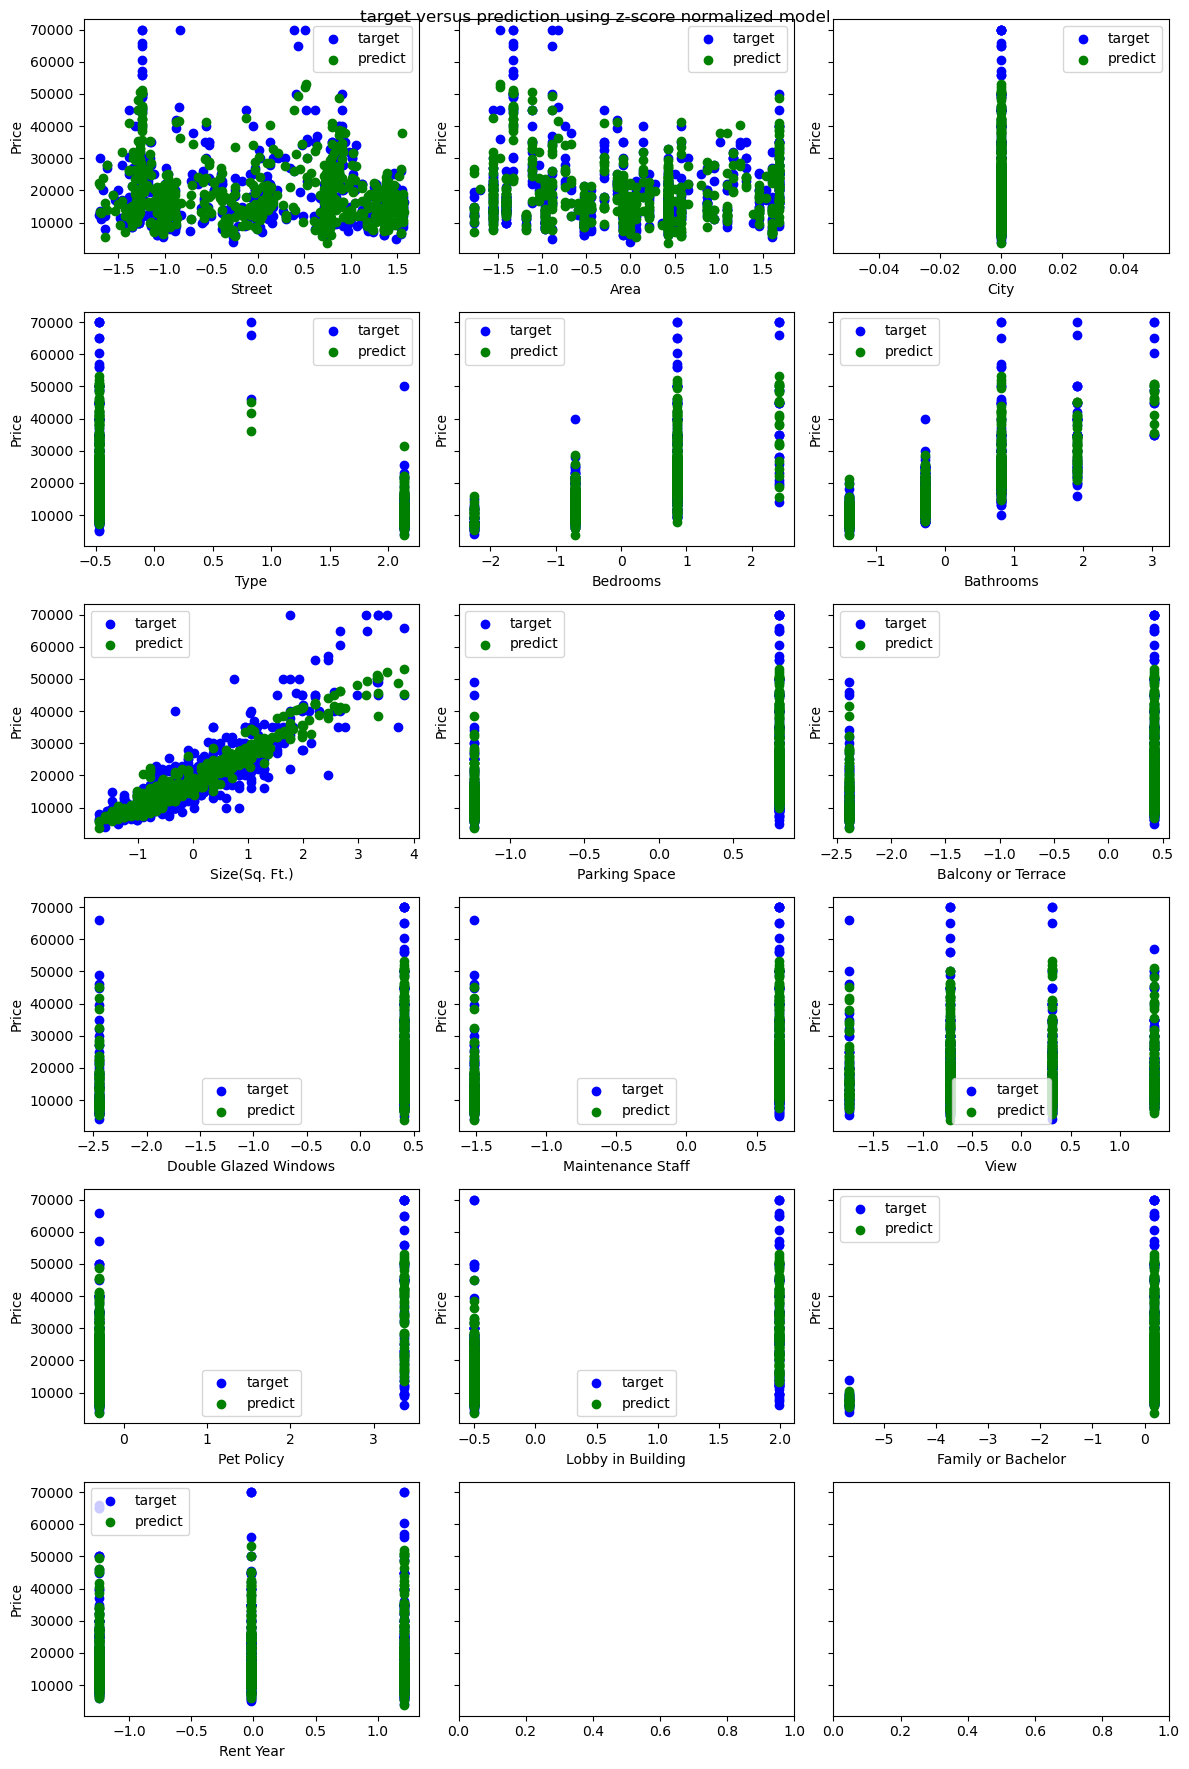

In [267]:
# Ploting target vs z-score normalized predicted values
import math
plt_number_cols = 3
plt_numer_rows = math.ceil(X_test_scaled.shape[1] / plt_number_cols)
fig,ax=plt.subplots(plt_numer_rows, plt_number_cols, figsize=(12,18), sharey=True)
fig.suptitle("target versus prediction using z-score normalized model")
col_index = 0
for row in range(plt_numer_rows):
	for col in range(plt_number_cols):
		col_index = (row * plt_number_cols) + col
		if col_index >= X_test_scaled.shape[1]:
			break
		ax[row][col].scatter(X_test_scaled[:,col_index], y_test, label='target', c="blue")
		ax[row][col].set_xlabel(X_train.columns[col_index])
		ax[row][col].scatter(X_test_scaled[:,col_index], sgd_regr_pred, label='predict', c="green")
		ax[row][col].set_ylabel("Price")
		ax[row][col].legend()
plt.tight_layout()
plt.show()

In [196]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear_regr = LinearRegression()
linear_regr.fit(X_train_scaled, y_train)
linear_reg_pred = linear_regr.predict(X_test_scaled)
DisplayModelEvaluation(X_test_scaled, y_test, linear_reg_pred, linear_regr)

In [197]:
# Ridge
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.039)
ridge_reg.fit(X_train_scaled, y_train)
ridge_reg_pred = ridge_reg.predict(X_test_scaled)
DisplayModelEvaluation(X_test_scaled, y_test, ridge_reg_pred, ridge_reg)

In [198]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree_regr = DecisionTreeRegressor()
tree_regr.fit(X_train_scaled, y_train)
tree_regr_pred = tree_regr.predict(X_test_scaled)
DisplayModelEvaluation(X_test_scaled, y_test, tree_regr_pred, tree_regr)

In [199]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regr.fit(X_train_scaled, y_train)
rf_regr_pred = rf_regr.predict(X_test_scaled)
DisplayModelEvaluation(X_test_scaled, y_test, rf_regr_pred, rf_regr)

In [200]:
# Support Vector Machine Regressor
from sklearn import svm
svm_regr = svm.SVR()
svm_regr.fit(X_train_scaled, y_train)
svm_regr_pred = svm_regr.predict(X_test_scaled)
DisplayModelEvaluation(X_test_scaled, y_test, svm_regr_pred, svm_regr)

In [202]:
# Fine-Tuning Model with Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
	{'n_estimators': [3, 10, 30], 'max_features': [3, 10, 15]},
	{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [10, 15]},
]
forest_regr = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_regr, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)
grid_search_pred = svm_regr.predict(X_test_scaled)
DisplayModelEvaluation(X_test_scaled, y_test, grid_search_pred, grid_search)

In [203]:
cvres = grid_search.cv_results_
grid_results = []
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
	grid_results = grid_results + [(np.sqrt(-mean_score), params)]
pd.DataFrame(grid_results, columns=["RMSE", "Params"]).sort_values(by="RMSE")

,RMSE,Params
2,4182.810553,"{'max_features': 3, 'n_estimators': 30}"
5,4214.292950,"{'max_features': 10, 'n_estimators': 30}"
8,4263.292296,"{'max_features': 15, 'n_estimators': 30}"
1,4311.761879,"{'max_features': 3, 'n_estimators': 10}"
4,4330.338977,"{'max_features': 10, 'n_estimators': 10}"
7,4342.486221,"{'max_features': 15, 'n_estimators': 10}"
10,4470.424441,"{'bootstrap': False, 'max_features': 10, 'n_es..."
6,4720.202857,"{'max_features': 15, 'n_estimators': 3}"
9,4755.004361,"{'bootstrap': False, 'max_features': 10, 'n_es..."
3,4757.932744,"{'max_features': 10, 'n_estimators': 3}"


<BarContainer object of 16 artists>

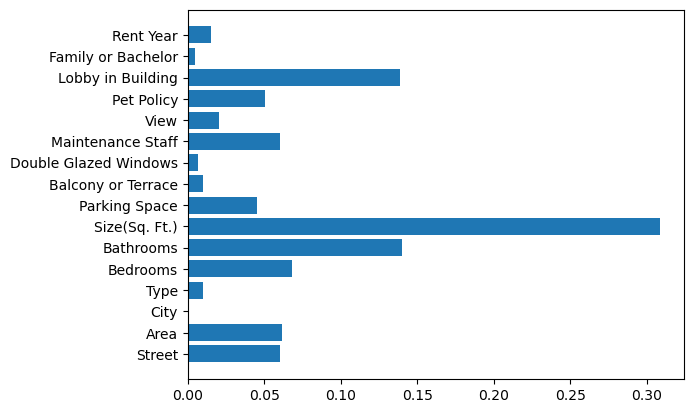

In [204]:
# Visualize feature importance in the dataset
features_importance = grid_search.best_estimator_.feature_importances_
features_importance_list = list(features_importance)
plt.barh(y=X_train.columns, width=features_importance_list)

# Conclusions

## 1) Over-fitting or Under-fitting Issues
As we can see before applying some machine learning modals like Linear regression, Ridge, Decision Tree Regressor and  Random Forest Regressor, we found that the accuracy score is in the range of (71% -82%) so the model has not issues Over-fitting or Under-fitting Issues.

## 2) Data imbalance issues

Based on the features histogram we can see the imbalance of the following features:

In [284]:
# Most of these features are 'Apartment' or 'Room'
pd.DataFrame({ 'Type': df['Type'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%' }).T

Type,Apartment,Room,Duplex
Type,81.8%,17.6%,0.6%


In [283]:
# Most of these features are has more data either in 'Yes' or 'No' values
pd.DataFrame({
	'Balcony or Terrace': df['Balcony or Terrace'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%',
	'Double  Glazed Windows': df['Double Glazed Windows'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%',
	'Maintenance Staff': df['Maintenance Staff'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%',
	'Pet Policy': df['Pet Policy'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%',
	'Lobby in Building': df['Lobby in Building'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%',
	'Family or Bachelor': df['Family or Bachelor'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
}).T

,No,Yes
Balcony or Terrace,14.0%,86.0%
Double Glazed Windows,13.1%,86.9%
Maintenance Staff,29.1%,70.9%
Pet Policy,93.2%,6.8%
Lobby in Building,80.7%,19.3%
Family or Bachelor,4.5%,95.5%


## 3) Models issues

I found higher values in the columns Size and Price so i removed some of that data with the outliers treatment, so we could replace and missing important values for the analysis and predictions, so in order to improve our model would be fine if we can include more samples with higher sizes and prices respectively.

## 4) Make the model more efficiente

The model could be more efficiente if we include more cities, house types in the dataset as we are only testing mostly the city of Dhaka, Apartments and some categorical data (Balcony or Terrace, Double Glazed Windows, Lobby in Building and Family or Bachelor) are imbalanced, so including that data could give us more information about the features behavior in the dataset and get better house price predictions.